# Application of EDA - G2M insight for Cab Investment firm
## EXPLORATORY DATA ANALYSIS TO GAIN MEANINGFUL INSIGHTS

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

# Ignoring warnings from plots
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading in the four datasets
Cab_data = pd.read_csv("Dataset/Cab_data.csv")
TransactionID_data = pd.read_csv("Dataset/Transaction_ID.csv")
City_data = pd.read_csv("Dataset/City.csv")
CustomerID_data = pd.read_csv("Dataset/Customer_ID.csv")

# DATA PREPARATION
## Data Understanding

In [3]:
# Displaying the Cab_data first five records
Cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
# Getting more insights from the Cab_data
Cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [5]:
# Getting the row and column sizes for the Cab_data
Cab_data.shape

(359392, 7)

In [6]:
# Displaying the TransactionID_data first five records
TransactionID_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [7]:
# Getting more insights from the TransactionID_data
TransactionID_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [8]:
# Getting the row and column sizes for the TransactionID_data
TransactionID_data.shape

(440098, 3)

In [9]:
# Displaying the City_data first five records
City_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [10]:
# Getting more insights from the city_data
City_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [11]:
# Getting the row and column sizes for the City_data
City_data.shape

(20, 3)

In [12]:
# Displaying the CustomerID_data first five records
CustomerID_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [13]:
# Getting more insights from the CustomerID_data
CustomerID_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [14]:
# Getting the row and column sizes for the CustomerID_data
CustomerID_data.shape

(49171, 4)

## DATA CLEANING

### Checking for Null values in the Datasets

In [15]:
Cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [16]:
TransactionID_data.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [17]:
City_data.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [18]:
CustomerID_data.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

**From the above analysis, there are no null values in the rows**

### Checking for dublicate rows

In [19]:
Cab_data.loc[Cab_data.duplicated()]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip


In [20]:
TransactionID_data.loc[TransactionID_data.duplicated()]

,Transaction ID,Customer ID,Payment_Mode


In [21]:
City_data.loc[City_data.duplicated()]

,City,Population,Users


In [22]:
CustomerID_data.loc[CustomerID_data.duplicated()]

,Customer ID,Gender,Age,Income (USD/Month)


**From the above analysis, there are no dublicated rows**

### Replacing spaces in the dataset fields to dashes

In [23]:
# Replacing ' ' to '-' field names in Cab_Data
for field in Cab_data.columns:
    if ' ' in field:
        Cab_data = Cab_data.rename(columns={field:field.replace(' ','_')})

In [24]:
# Replacing ' ' to '-' field names in TransactionID_Data
for field in TransactionID_data.columns:
    if ' ' in field:
        TransactionID_data = TransactionID_data.rename(columns={field:field.replace(' ','_')})

In [25]:
# Replacing ' ' to '-' field names in City_Data
for field in City_data.columns:
    if ' ' in field:
        City_data = City_data.rename(columns={field:field.replace(' ','_')})

In [26]:
# Replacing ' ' to '-' field names in Customer_ID_Data
for field in CustomerID_data.columns:
    if ' ' in field:
        CustomerID_data = CustomerID_data.rename(columns={field:field.replace(' ','_')})

### Correcting the 'Date_of_Travel' values in the Cab_data

In [27]:
# Convert the Excel date serial numbers to DateTime
Cab_data['Date_of_Travel'] = pd.to_datetime(Cab_data['Date_of_Travel'], unit='D', origin='1899-12-30')


In [28]:
# Confirming the newly converted 'Date_of_Travel' column
Cab_data.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [29]:
# Creating 'Month' and 'Year' columns and dropping the 'Date_of_Travel' column
months=[]
years =[]
for x in range(len(Cab_data['Date_of_Travel'])):
    months.append(Cab_data['Date_of_Travel'][x].month)
    years.append(Cab_data['Date_of_Travel'][x].year)
Cab_data['Month'] = months
Cab_data['Year'] = years

Cab_data.drop('Date_of_Travel', axis=1, inplace=True)

In [30]:
# Confirming the newly created 'Month' and 'Year' columns
Cab_data.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016


In [31]:
# Define a dictionary to map month numbers in the 'Month' column to month names
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Replace numeric month values with month names
Cab_data['Month'] = Cab_data['Month'].map(month_names)

# Print the first five rows of the Cab_data DataFrame
Cab_data.head()


,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,January,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,January,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,January,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,January,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,January,2016


In [32]:
# Splitting the dataset into Pink_Cab and Yellow_Cab datasets
Pink_Cab = Cab_data[Cab_data['Company']=='Pink Cab']
Yellow_Cab = Cab_data[Cab_data['Company']=='Yellow Cab']

In [33]:
# Displaying the first five rows of Pink_Cab
Pink_Cab.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,January,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,January,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,January,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,January,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,January,2016


In [34]:
# Displaying the first five rows of Yellow_Cab
Yellow_Cab.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
233,10000384,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,January,2016
234,10000385,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,January,2016
235,10000386,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,January,2016
236,10000387,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,January,2016
237,10000388,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,January,2016


### Correcting City_data 'Population' and 'users' columns from strings to numeric fields

In [35]:
# Remove commas and convert fields to integers
City_data["Population"] = City_data["Population"].str.replace(',', '', regex=True).astype(int)


City_data["Users"] = City_data["Users"].str.replace(',', '', regex=True).astype(int)

City_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int32 
 2   Users       20 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 448.0+ bytes


In [36]:
City_data.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


### Renaming the 'Income_(USD/Month)' field of CustomerID_data to 'Income'

In [37]:
# Renaming and displaying the newly changed CustomerID_data dataframe characteristics
CustomerID_data = CustomerID_data.rename(columns={'Income_(USD/Month)':'Income'})
CustomerID_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer_ID  49171 non-null  int64 
 1   Gender       49171 non-null  object
 2   Age          49171 non-null  int64 
 3   Income       49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


# Exploratory Data Analysis - EDA
## Feature Understanding

In [38]:
# Grouping the Pink Cab by Month
PinkCab_Month = Cab_data[Cab_data.Company == 'Pink Cab'].groupby(['Month']).Transaction_ID.count()

# Sort the output by Month
sorted_PinkCab_Month = PinkCab_Month.reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)

# Print the sorted result
print(sorted_PinkCab_Month)



Month
January       5057
February      3375
March         4223
April         4083
May           4960
June          5877
July          6590
August        7739
September     9658
October      10576
November     11005
December     11568
Name: Transaction_ID, dtype: int64


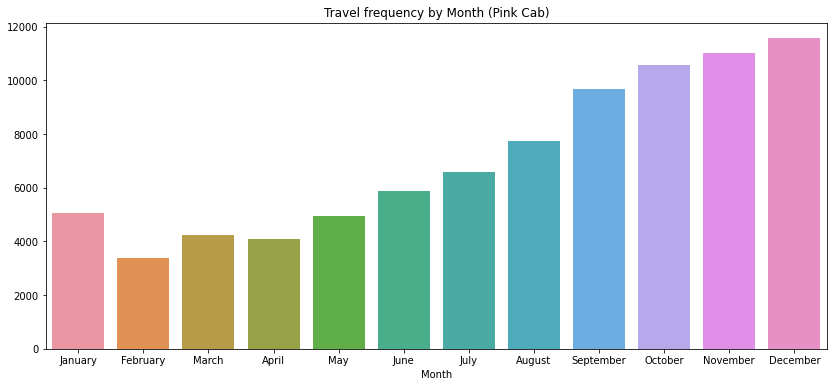

In [39]:
# Plotting the Travel frequency of the Pink Cab by Month
plt.figure(figsize=(14,6))
sns.barplot(x=sorted_PinkCab_Month.index,y=sorted_PinkCab_Month.values)
plt.title('Travel frequency by Month (Pink Cab)')
plt.show()

In [40]:
# Grouping the Pink Cab by Month
YellowCab_Month = Cab_data[Cab_data.Company == 'Yellow Cab'].groupby(['Month']).Transaction_ID.count()

# Sort the output by Month
sorted_YellowCab_Month = YellowCab_Month.reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)

# Print the sorted result
print(sorted_YellowCab_Month)



Month
January      18117
February     14932
March        17423
April        17351
May          18741
June         18836
July         21086
August       23584
September    27201
October      30276
November     31695
December     35439
Name: Transaction_ID, dtype: int64


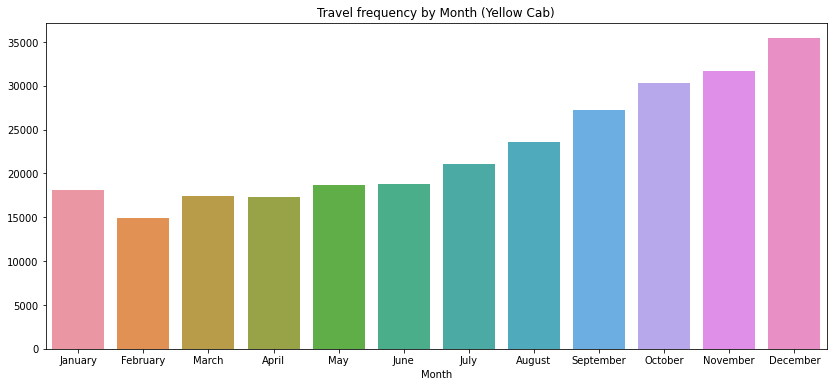

In [41]:
# Plotting the Travel frequency of the yellow Cab by Month
plt.figure(figsize=(14,6))
sns.barplot(x=sorted_YellowCab_Month.index,y=sorted_YellowCab_Month.values)
plt.title('Travel frequency by Month (Yellow Cab)')
plt.show()

**From the above charts, we can see clearly that Yellow Cab (14,932 KM - 35,439 KM) generally has higher travel distances than Pink Cab (3,375 KM - 11,568 KM) with a very wide margin. A notable comparison can be seen in the holiday season (December) where Yellow Cab has a higher travel distance (35,439 KM) than Pink Cab (11,568 KM).**

In [42]:
# Gaining insights of the distance travelled between the two cabs
Total_travelled = Cab_data['KM_Travelled'].describe()
PinkCab_travelled = Pink_Cab['KM_Travelled'].describe()
YellowCab_travelled = Yellow_Cab['KM_Travelled'].describe()

In [43]:
# Displaying the metrics of the distance travelled between the two cabs
Overall_Distance = pd.DataFrame({'Total': Total_travelled.values,
                  'PinkCab': PinkCab_travelled.values,
                  'YellowCab': PinkCab_travelled.values}, index= ['Count', 'Mean', 'Std. Dev.', 'Min', '25%', '50%', '75%', 'Max'])
Overall_Distance

,Total,PinkCab,YellowCab
Count,359392.000000,84711.000000,84711.000000
Mean,22.567254,22.559917,22.559917
Std. Dev.,12.233526,12.231092,12.231092
Min,1.900000,1.900000,1.900000
25%,12.000000,12.000000,12.000000
50%,22.440000,22.440000,22.440000
75%,32.960000,32.960000,32.960000
Max,48.000000,48.000000,48.000000


Text(0, 0.5, 'frequency')

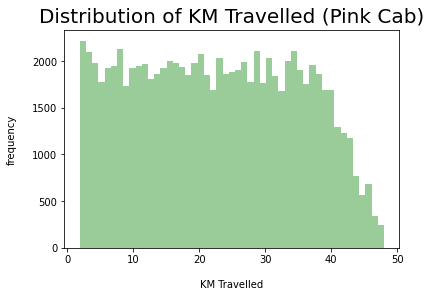

In [44]:
# Plotting a frequency table of the distance travelled for the pink cab
ax = sns.distplot(Pink_Cab['KM_Travelled'], kde=False, color='green')
plt.title("Distribution of KM Travelled (Pink Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)

Text(0, 0.5, 'frequency')

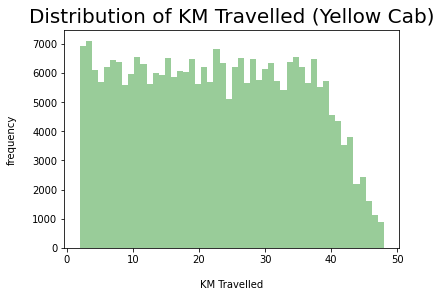

In [45]:
# Plotting a frequency table of the distance travelled for the yellow cab
ax = sns.distplot(Yellow_Cab['KM_Travelled'], kde=False, color='green')
plt.title("Distribution of KM Travelled (Yellow Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)

**From the analysis of the above charts, we can see that the distance traveled in the two cabs are about the same which is approximately between the range of 2 to 48 KMs.**

In [46]:
# Gaining insights of the price charged between the two cabs
Total_price = Cab_data['Price_Charged'].describe()
PinkCab_price = Pink_Cab['Price_Charged'].describe()
YellowCab_price = Yellow_Cab['Price_Charged'].describe()

In [47]:
# Displaying the metrics of the distance travelled between the two cabs
Overall_Price = pd.DataFrame({'Total': Total_price.values,
                  'PinkCab': PinkCab_price.values,
                  'YellowCab': YellowCab_price.values}, index= ['Count', 'Mean', 'Std. Dev.', 'Min', '25%', '50%', '75%', 'Max'])
Overall_Price

,Total,PinkCab,YellowCab
Count,359392.000000,84711.000000,274681.000000
Mean,423.443311,310.800856,458.181990
Std. Dev.,274.378911,181.995661,288.386166
Min,15.600000,15.600000,20.730000
25%,206.437500,159.970000,226.680000
50%,386.360000,298.060000,425.060000
75%,583.660000,441.505000,633.880000
Max,2048.030000,1623.480000,2048.030000


Text(0.5, 1.0, 'Yellow Cab')

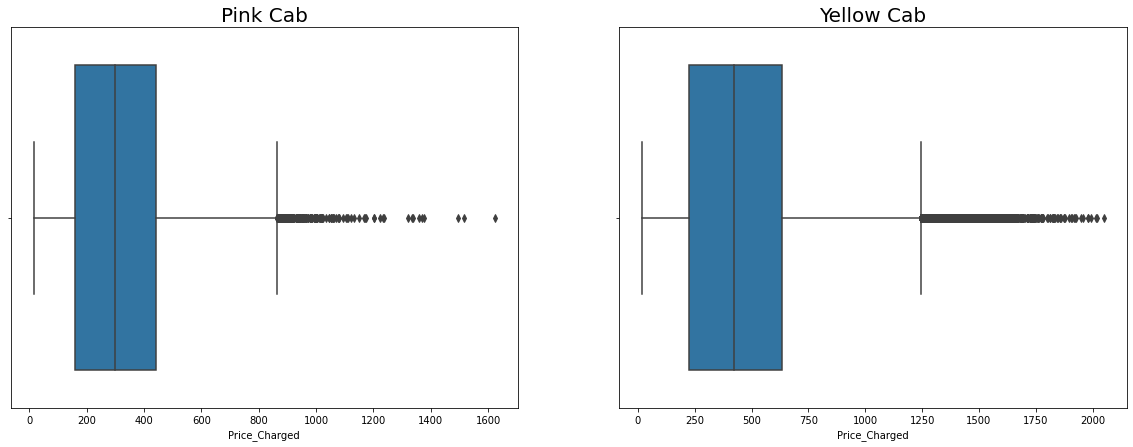

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))
sns.boxplot(Pink_Cab['Price_Charged'], ax=ax1)
ax1.set_title('Pink Cab', fontsize=20)
sns.boxplot(Yellow_Cab['Price_Charged'], ax=ax2)
ax2.set_title('Yellow Cab', fontsize=20)

- **From the above boxplots, we could see that there are some outliers in price charged. This could be some cases where the prices charged are high compared to the regular charges.**
- **We can also see that the price charge range for Yellow cab is generally more than that of the Pink cab.**


[Text(-10.0, 0, ''),
 Text(0.0, 0, ''),
 Text(10.0, 0, ''),
 Text(20.0, 0, ''),
 Text(30.0, 0, ''),
 Text(40.0, 0, ''),
 Text(50.0, 0, ''),
 Text(60.0, 0, '')]

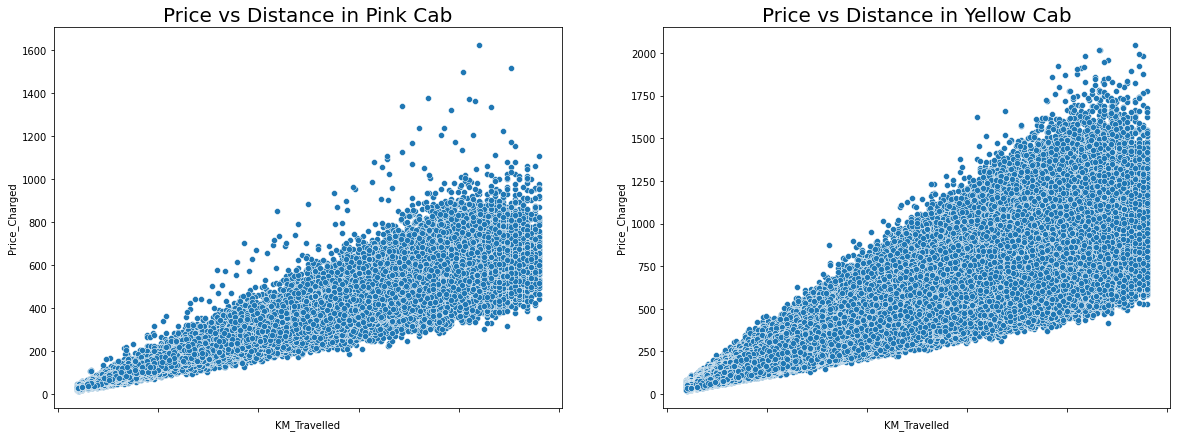

In [49]:
# Scatter plots of Price VS Distance of both cabs
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))
sns.scatterplot(Pink_Cab['KM_Travelled'], Pink_Cab['Price_Charged'], ax=ax1)
ax1.set_title('Price vs Distance in Pink Cab', fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)
sns.scatterplot(Yellow_Cab['KM_Travelled'], Yellow_Cab['Price_Charged'], ax=ax2)
ax2.set_title('Price vs Distance in Yellow Cab', fontsize=20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=15)

In [50]:
# Pink_Cab 'KM_Travelled' VS 'Price_Charged' Correlation
Pink_Cab['KM_Travelled'].corr(Pink_Cab['Price_Charged'])

0.9277652782594851

In [51]:
# Yellow_Cab 'KM_Travelled' VS 'Price_Charged' Correlation
Yellow_Cab['KM_Travelled'].corr(Yellow_Cab['Price_Charged'])

0.859708629447849

### Generally, Distance travelled is one of the factors that determines the price charged. 
- **We could see that there is a positive correlation in the graph for both Pink and Yellow cab.**
- **The prices charged for the Yellow cab is higher than that of the Pink cab.**

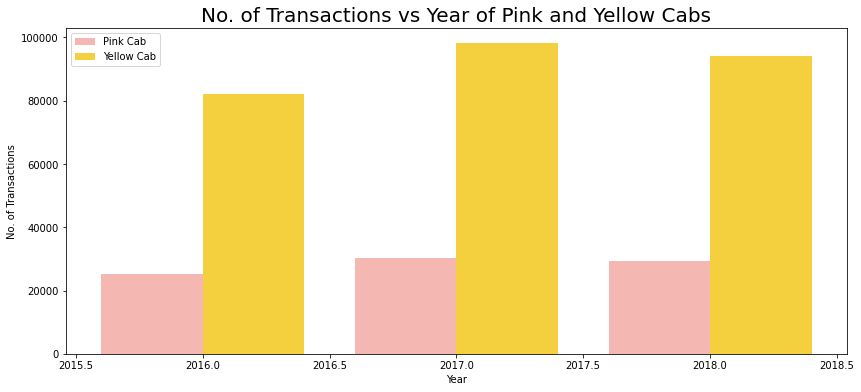

In [52]:
# Bar charts of No. of Transactions vs Year of Pink and Yellow Cabs
plot1 = Cab_data[Cab_data.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plot2 = Cab_data[Cab_data.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='#F5B7B1', align='center',label='Pink Cab')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, color='#F4D03F', align='center',label='Yellow Cab')
ax.set_title('No. of Transactions vs Year of Pink and Yellow Cabs', fontsize=20)
plt.ylabel('No. of Transactions')
plt.xlabel('Year')
plt.legend()
plt.show()

**From the above bar chart, we can see based on the given years that the transactions for the Yellow cab are higher than the Pink cab by about three times.**

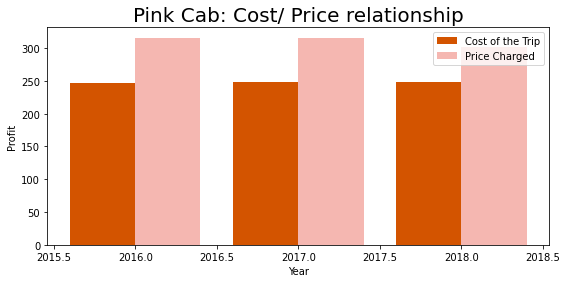

In [53]:
# Chart showing the difference between the cost of the trip and the Price for Pink Cab
plot1 = Cab_data[Cab_data.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plot3 = Cab_data[Cab_data.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()
plot4 = Cab_data[Cab_data.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(9,4))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='#D35400', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='#F5B7B1', align='center',label='Price Charged')
plt.ylabel('Profit')
plt.xlabel('Year')
plt.title('Pink Cab: Cost/ Price relationship', fontsize=20)
plt.legend()
plt.show()

In [54]:
# Cost of the trip grouped by year for Pink Cab
PinkCab_Cost = Cab_data[Cab_data.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()
PinkCab_Cost

Year
2016    247.008294
2017    248.836603
2018    248.412841
Name: Cost_of_Trip, dtype: float64

In [55]:
# Price of the trip grouped by year for Pink Cab
PinkCab_Price = Cab_data[Cab_data.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()
PinkCab_Price

Year
2016    315.330113
2017    315.907442
2018    301.642530
Name: Price_Charged, dtype: float64

In [56]:
# Profit made for Pink cab for each year
PinkCab_Profit = PinkCab_Price - PinkCab_Cost
PinkCab_Profit

Year
2016    68.321819
2017    67.070839
2018    53.229689
dtype: float64

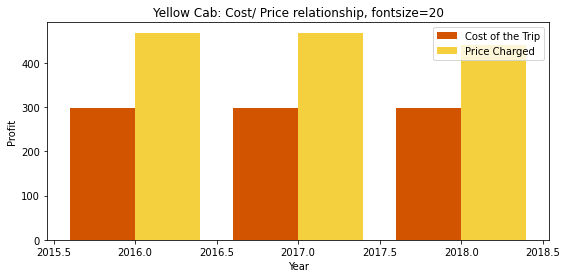

In [57]:
# Chart showing the difference between the cost of the trip and the Price for Yellow Cab
plot1 = Cab_data[Cab_data.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plot3 = Cab_data[Cab_data.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()
plot4 = Cab_data[Cab_data.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(9,4))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='#D35400', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='#F4D03F', align='center',label='Price Charged')
plt.ylabel('Profit')
plt.xlabel('Year')
plt.title('Yellow Cab: Cost/ Price relationship, fontsize=20')
plt.legend()
plt.show()

In [58]:
# Cost of the trip grouped by year for Yellow Cab
YellowCab_Cost = Cab_data[Cab_data.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()
YellowCab_Cost

Year
2016    298.570481
2017    297.822893
2018    297.459436
Name: Cost_of_Trip, dtype: float64

In [59]:
# Price of the trip grouped by year for Yellow Cab
YellowCab_Price = Cab_data[Cab_data.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()
YellowCab_Price

Year
2016    467.918301
2017    466.639950
2018    440.875558
Name: Price_Charged, dtype: float64

In [60]:
# Profit made for Yellow cab for each year
YellowCab_Profit = YellowCab_Price - YellowCab_Cost
YellowCab_Profit

Year
2016    169.347821
2017    168.817057
2018    143.416122
dtype: float64

**The Yellow cab has a higher Profit Margin (Price Charged - Cost of Trip) for each year compared to Pink cab as can be see in the above analysis**

Text(0.5, 0, 'Pink Cab KM Travelled')

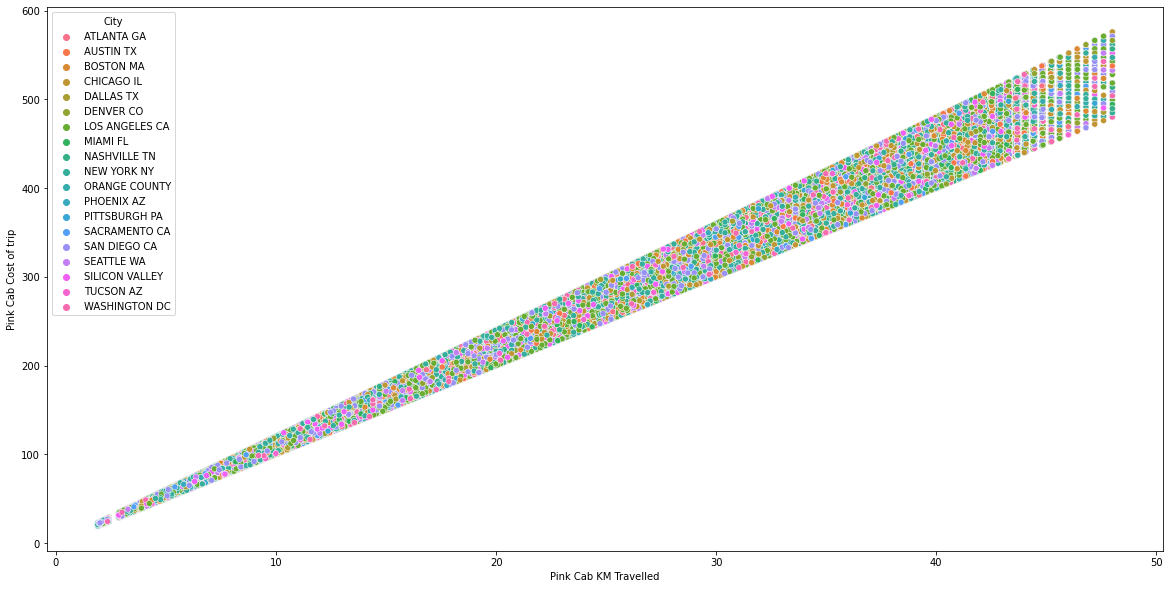

In [61]:
# Scatter plot comparing the Cost of trip with the KM Travelled for the Pink Cab
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_data, x=Pink_Cab["KM_Travelled"], y=Pink_Cab['Cost_of_Trip'], hue="City")
plt.ylabel('Pink Cab Cost of trip')
plt.xlabel('Pink Cab KM Travelled')

Text(0.5, 0, 'Yellow Cab KM Travelled')

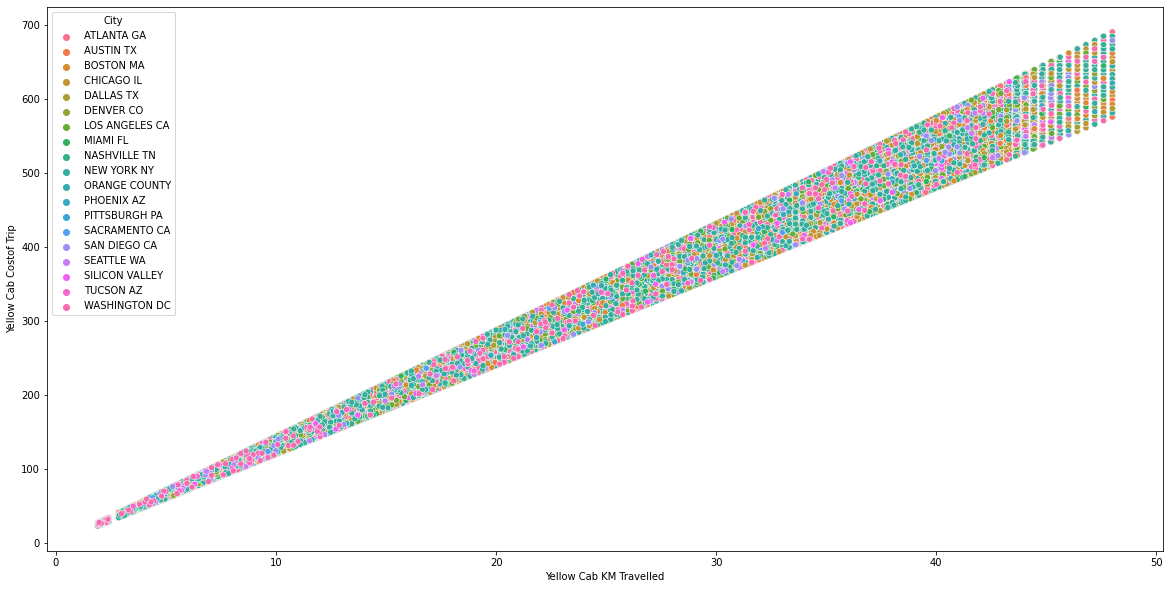

In [62]:
# Scatter plot comparing the Cost of trip with the KM Travelled for the Yellow Cab
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_data, x=Yellow_Cab["KM_Travelled"], y=Yellow_Cab['Cost_of_Trip'], hue="City")
plt.ylabel('Yellow Cab Costof Trip')
plt.xlabel('Yellow Cab KM Travelled')

**From the the two scatter plots, we can see that the cost of trip of the Yellow Cab is slightly higher than the cost of trip of the Pink Cab**

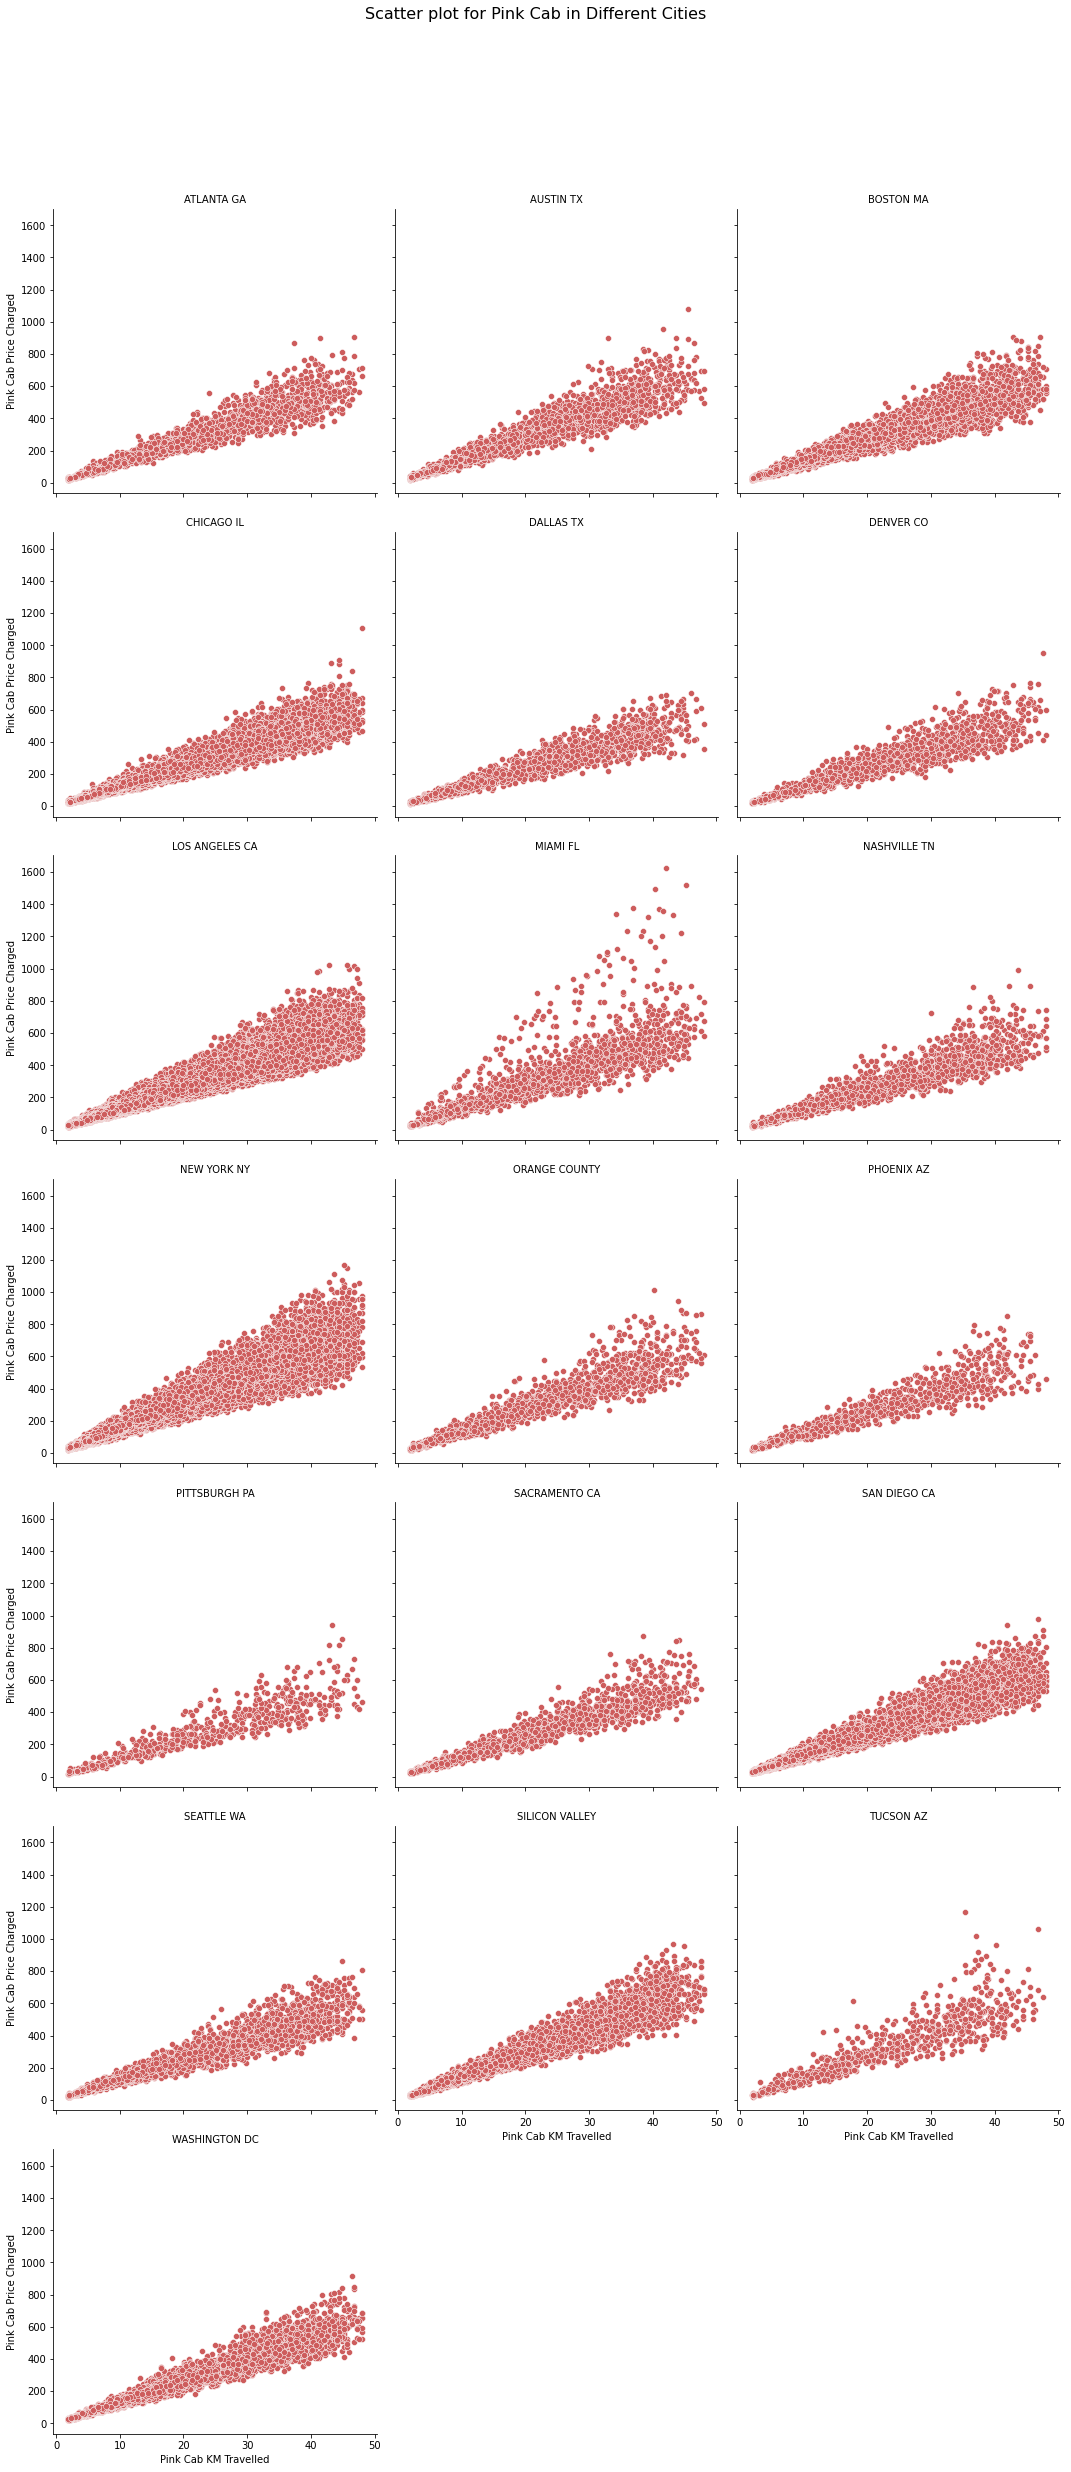

In [63]:
# FacetGrid of Price Charged vs KM Travelled for each City for the Pink Cab
p = sns.FacetGrid(Pink_Cab, col="City", col_wrap=3, height=5)

# Scatter plot comparing Price Charged with KM Travelled for each city
p.map(sns.scatterplot, "KM_Travelled", "Price_Charged", color='#CD5C5C')

# Set axis labels and titles
p.set_axis_labels('Pink Cab KM Travelled', 'Pink Cab Price Charged')
p.set_titles(col_template="{col_name}")

# Adjust plot layout
plt.subplots_adjust(top=0.9)
p.fig.suptitle('Scatter plot for Pink Cab in Different Cities', fontsize=16)

# Show the plot
plt.show()


**From the chart above, we could see from the Pink-Cabs City plots, that all the cities have similar trend in Price Charged when plotted against KM Travelled. Although, New York city is slighty higher with more price charged while Orange County has more outliers.**

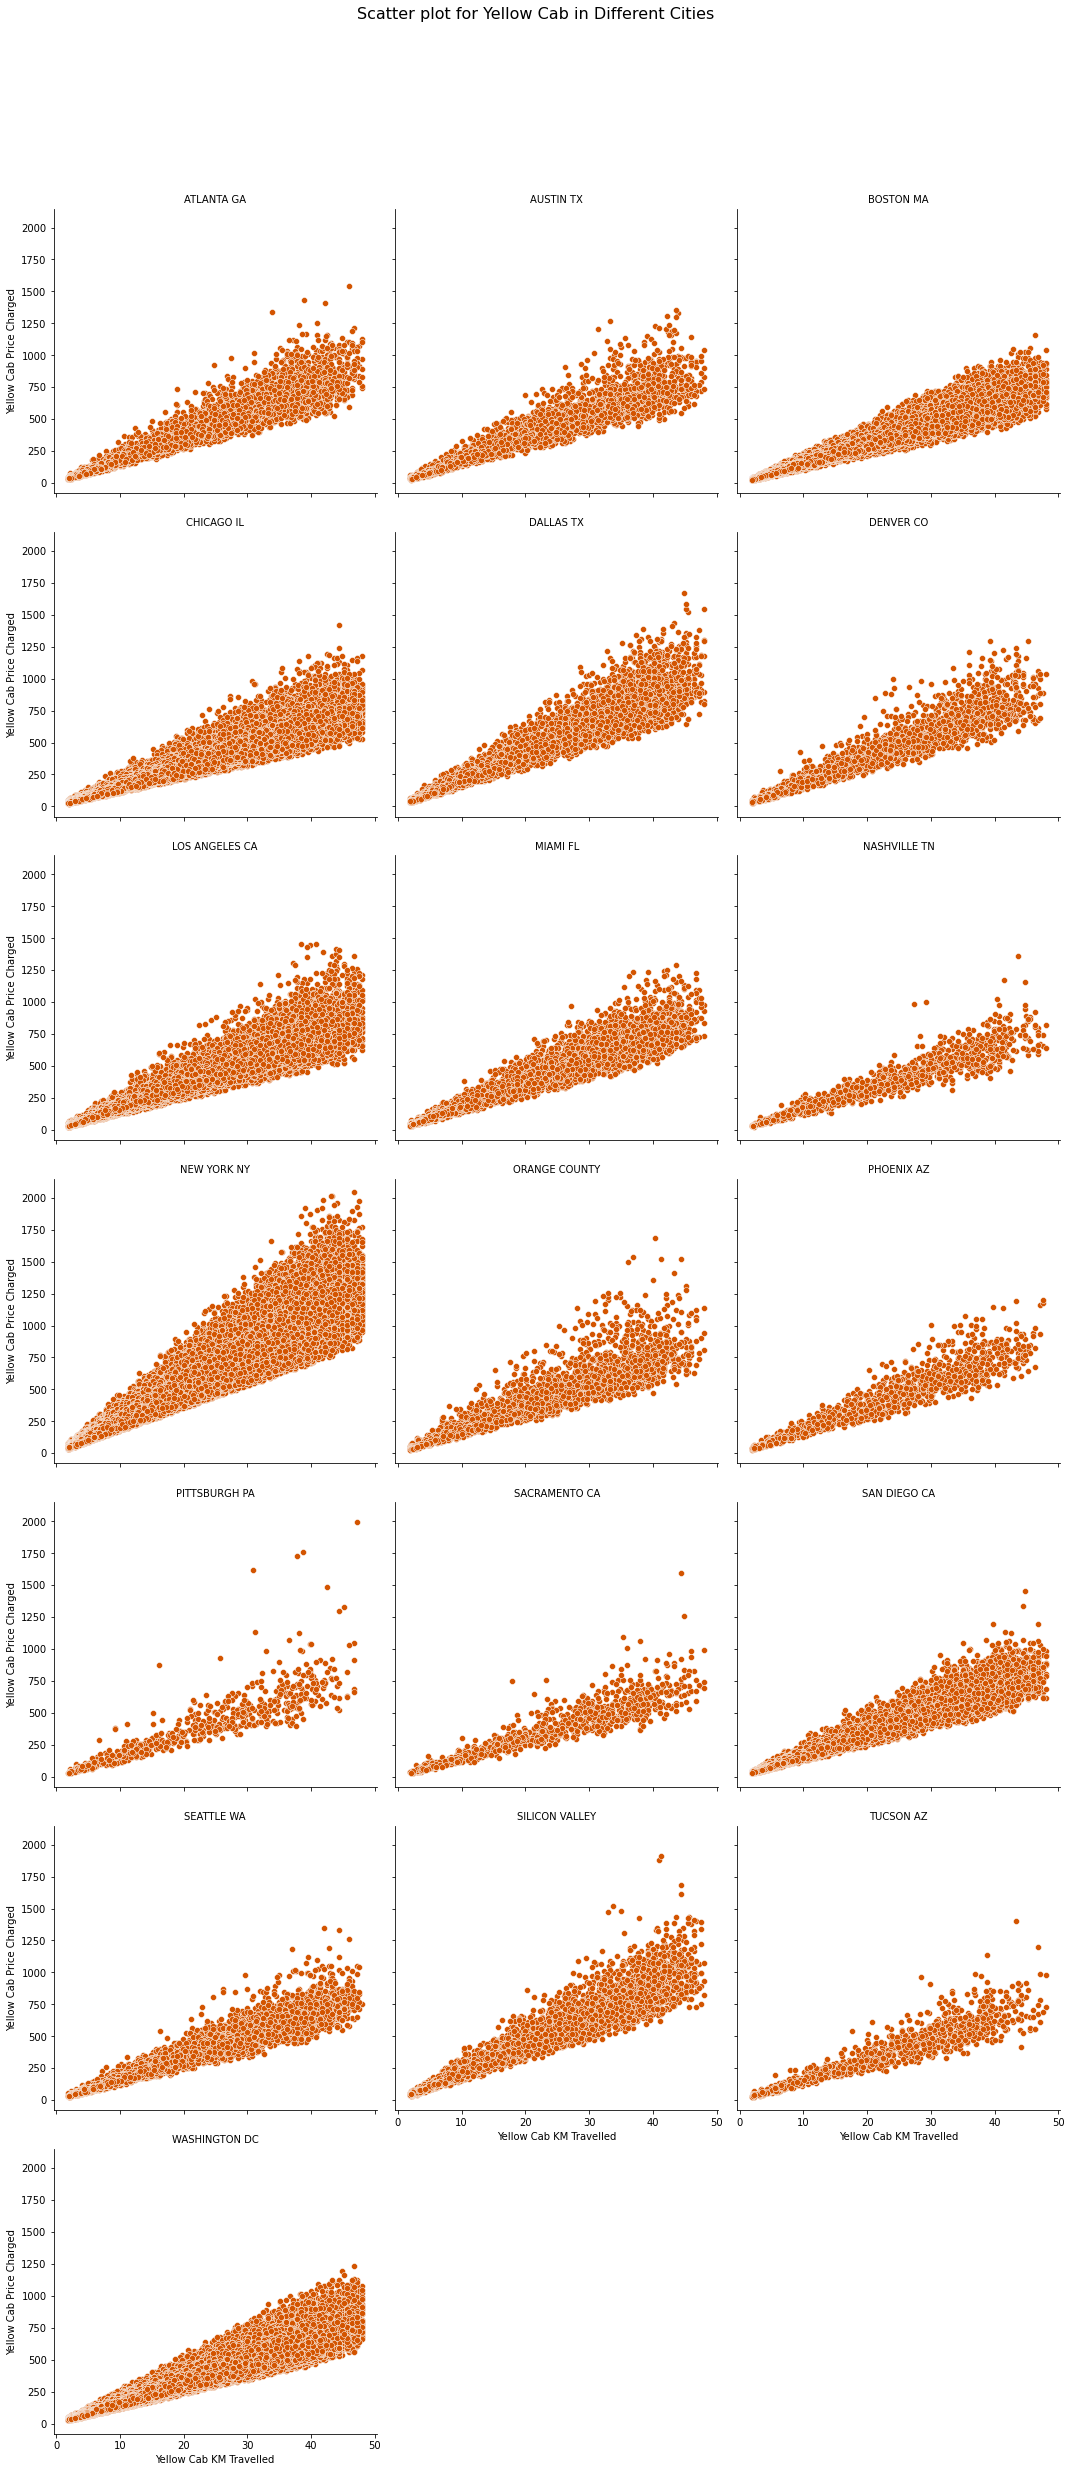

In [64]:
# FacetGrid of Price Charged vs KM Travelled for each City for the Yellow Cab
y = sns.FacetGrid(Yellow_Cab, col="City", col_wrap=3, height=5)

# Scatter plot comparing Price Charged with KM Travelled for each city
y.map(sns.scatterplot, "KM_Travelled", "Price_Charged", color="#D35400")

# Set axis labels and titles
y.set_axis_labels('Yellow Cab KM Travelled', 'Yellow Cab Price Charged')
y.set_titles(col_template="{col_name}")

# Adjust plot layout
plt.subplots_adjust(top=0.9)
y.fig.suptitle('Scatter plot for Yellow Cab in Different Cities', fontsize=16)

# Show the plot
plt.show()



**From the chart above, we could see from the Yellow-Cabs City plots, that there are some cities with higher Price Charged compared to others when plotted against KM Travelled. Although, New York city is much higher compared to the rest cities. Boston MA and Washinton DC has little or no outliers compared to the others.**

**For both the Pink and Yellow graphs, the trend are similar with both of them having the same increase in prices with increase in distance. In general, Yellow Cab charged more than Pink Cab and the Price Charged for New York City of the Yellow Cab is far more in comparison to the Pink Cab price Charged for the city.**


## Creating a Master Dataset containing the four datasets

In [65]:
# Joining the Cab_data and the TransactionID_data datasets on Transaction_ID field
Cab = Cab_data.set_index(['Transaction_ID'])
TransactionID = TransactionID_data.set_index(['Transaction_ID'])
Master_data = Cab.join(TransactionID)
Master_data.head()

,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode
Transaction_ID,,,,,,,,,
10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,January,2016,29290,Card
10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,January,2016,27703,Card
10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,January,2016,28712,Cash
10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,January,2016,28020,Cash
10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,January,2016,27182,Card


In [66]:
# Joining the Master_data and the CustomerID_data datasets on Customer_ID field
Master = Master_data.set_index([Master_data.index,'Customer_ID'])
CustomerID = CustomerID_data.set_index(['Customer_ID'])
Master_data = Master.join(CustomerID)
Master_data.head()

,,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income
Transaction_ID,Customer_ID,,,,,,,,,,,
10000011,29290,Pink Cab,ATLANTA GA,30.45,370.95,313.635,January,2016,Card,Male,28,10813
10000012,27703,Pink Cab,ATLANTA GA,28.62,358.52,334.854,January,2016,Card,Male,27,9237
10000013,28712,Pink Cab,ATLANTA GA,9.04,125.20,97.632,January,2016,Cash,Male,53,11242
10000014,28020,Pink Cab,ATLANTA GA,33.17,377.40,351.602,January,2016,Cash,Male,23,23327
10000015,27182,Pink Cab,ATLANTA GA,8.73,114.62,97.776,January,2016,Card,Male,33,8536


In [67]:
# Joining the Master_data and the City_data datasets on City field
Master = Master_data.set_index([Master_data.index,'City'])
City = City_data.set_index(['City'])
Master_data = Master.join(City)
Master_data.head()

,,,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income,Population,Users
Transaction_ID,Customer_ID,City,,,,,,,,,,,,
10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.635,January,2016,Card,Male,28,10813,814885,24701
10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.854,January,2016,Card,Male,27,9237,814885,24701
10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.632,January,2016,Cash,Male,53,11242,814885,24701
10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.602,January,2016,Cash,Male,23,23327,814885,24701
10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.776,January,2016,Card,Male,33,8536,814885,24701


In [68]:
# Getting more info on the full Master_data
Master_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 359392 entries, (10000011, 29290, 'ATLANTA GA') to (10440107, 52917, 'WASHINGTON DC')
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Company        359392 non-null  object 
 1   KM_Travelled   359392 non-null  float64
 2   Price_Charged  359392 non-null  float64
 3   Cost_of_Trip   359392 non-null  float64
 4   Month          359392 non-null  object 
 5   Year           359392 non-null  int64  
 6   Payment_Mode   359392 non-null  object 
 7   Gender         359392 non-null  object 
 8   Age            359392 non-null  int64  
 9   Income         359392 non-null  int64  
 10  Population     359392 non-null  int32  
 11  Users          359392 non-null  int32  
dtypes: float64(3), int32(2), int64(3), object(4)
memory usage: 47.6+ MB


In [69]:
# Resetting the index of the master_data for a complete dataset
Master_data = Master_data.reset_index()
Master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction_ID  359392 non-null  int64  
 1   Customer_ID     359392 non-null  int64  
 2   City            359392 non-null  object 
 3   Company         359392 non-null  object 
 4   KM_Travelled    359392 non-null  float64
 5   Price_Charged   359392 non-null  float64
 6   Cost_of_Trip    359392 non-null  float64
 7   Month           359392 non-null  object 
 8   Year            359392 non-null  int64  
 9   Payment_Mode    359392 non-null  object 
 10  Gender          359392 non-null  object 
 11  Age             359392 non-null  int64  
 12  Income          359392 non-null  int64  
 13  Population      359392 non-null  int32  
 14  Users           359392 non-null  int32  
dtypes: float64(3), int32(2), int64(5), object(5)
memory usage: 38.4+ MB


## Adding a new field 'Profit' to the Master_data

In [70]:
Master_data['Margin'] = (Master_data['Price_Charged']-Master_data['Cost_of_Trip'])
Master_data.head()

,Transaction_ID,Customer_ID,City,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income,Population,Users,Margin
0,10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.635,January,2016,Card,Male,28,10813,814885,24701,57.315
1,10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.854,January,2016,Card,Male,27,9237,814885,24701,23.666
2,10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.632,January,2016,Cash,Male,53,11242,814885,24701,27.568
3,10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.602,January,2016,Cash,Male,23,23327,814885,24701,25.798
4,10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.776,January,2016,Card,Male,33,8536,814885,24701,16.844


In [71]:
# Creating a new dataset of the Master_data for further analysis
data = Master_data[['KM_Travelled','Price_Charged','Cost_of_Trip','Month','Year','Age','Income','Margin']]
data.corr()

,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Age,Income,Margin
KM_Travelled,1.000000,0.835753,0.981848,-0.001072,-0.000369,-0.000544,0.462768
Price_Charged,0.835753,1.000000,0.859812,-0.036409,-0.003084,0.003228,0.864154
Cost_of_Trip,0.981848,0.859812,1.000000,-0.001773,-0.000189,-0.000633,0.486056
Year,-0.001072,-0.036409,-0.001773,1.000000,-0.000579,-0.001617,-0.060567
Age,-0.000369,-0.003084,-0.000189,-0.000579,1.000000,0.003907,-0.005093
Income,-0.000544,0.003228,-0.000633,-0.001617,0.003907,1.000000,0.006148
Margin,0.462768,0.864154,0.486056,-0.060567,-0.005093,0.006148,1.000000


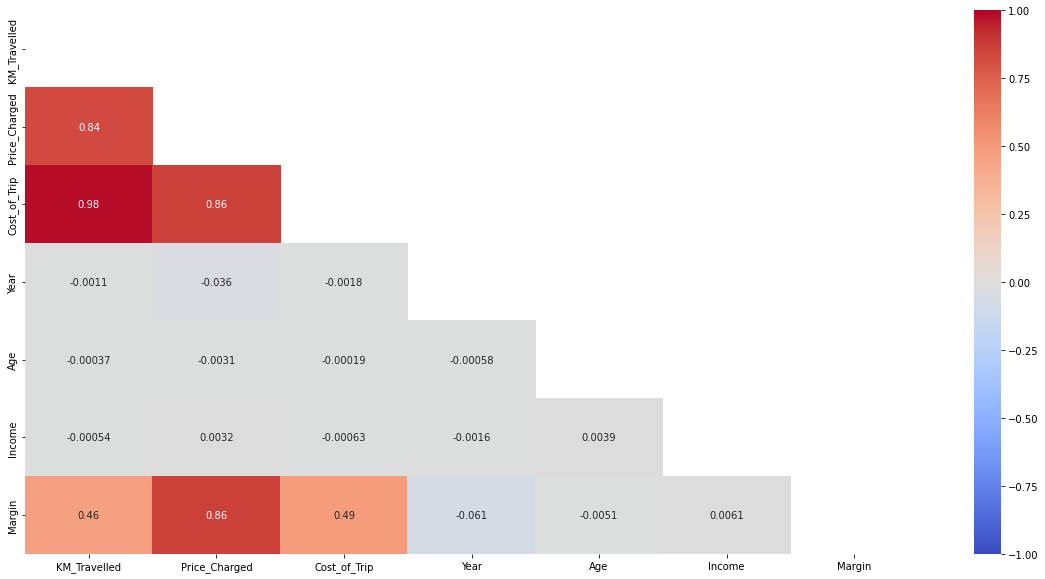

In [72]:
# Making a heatmap from the newly created data set
plt.figure(figsize=(20, 10))
corr_matrix = data.corr()

# Create a mask to hide the upper triangular part
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm', mask=mask)
plt.show()


- **From the above heatmap, we can see that there is a correlation between Margin and KM_Travelled, Price_Charged and Cost_of_Trip. However, it is more correlated with Price_Charged.**
- **KM_Travelled is correlated with Cost_of_Trip and Price_Charged. And finally, Price Charged is correlated with Cost_of_Trip.**

# EDA recommendation and hypothesis of results 

## Final Investigation Areas:
- **Which company has maximum cab users at a particular time period?**
- **Does margin proportionally increase with increase in number of customers?**
- **What are the attributes of these customer segments?**


### Which company has maximum cab users at a particular time period?

In [73]:
# Grouping the Master_data by Company, Year and Month and aggregating count of Users for both companies
Users_Cab=Master_data.groupby(['Company','Year', 'Month']).Users.count()
Users_Cab

Company     Year  Month    
Pink Cab    2016  April         1240
                  August        2272
                  December      3521
                  February      1050
                  January        927
                               ...  
Yellow Cab  2018  March         6058
                  May           6243
                  November     11230
                  October       9727
                  September     9149
Name: Users, Length: 72, dtype: int64

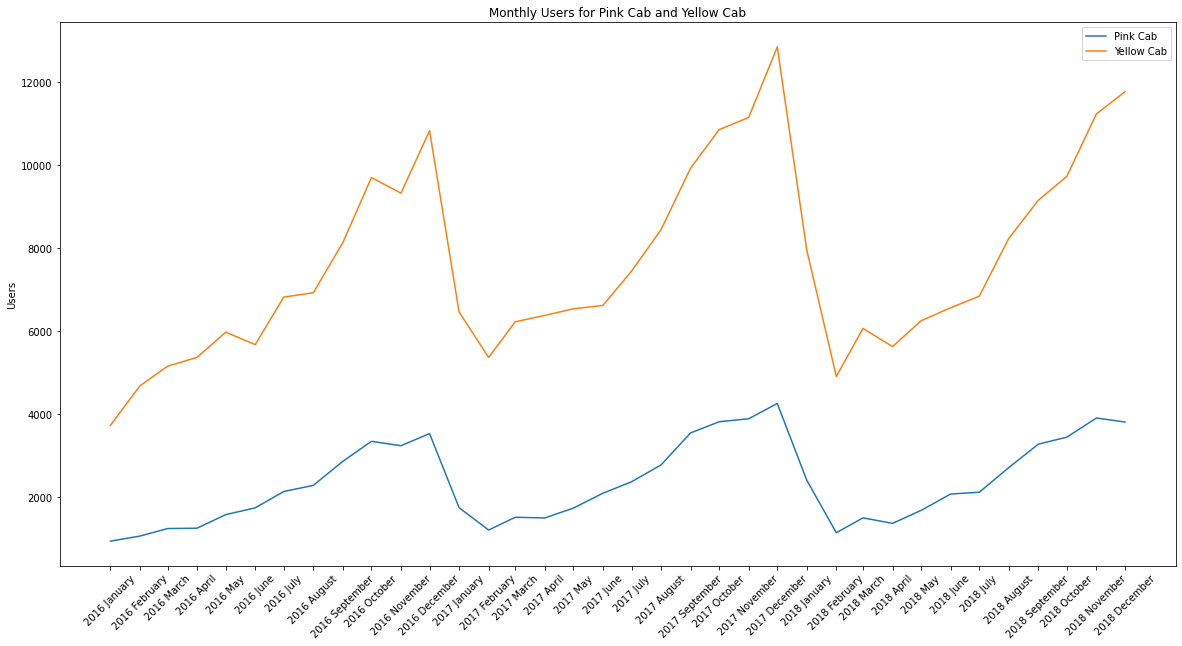

In [74]:
# Line chart of Max Users for the Pink Cab and the Yellow Cab viewed in same x-axis showing the year and the months period

# Reshape the data
Users_Cab = Users_Cab.reset_index()

# Filter data for Pink Cab and Yellow Cab separately
pink_cab_data = Users_Cab[Users_Cab['Company'] == 'Pink Cab']
yellow_cab_data = Users_Cab[Users_Cab['Company'] == 'Yellow Cab']

# Combine Year and Month as a string in a new column
pink_cab_data['YearMonth'] = pink_cab_data['Year'].astype(str) + ' ' + pink_cab_data['Month']
yellow_cab_data['YearMonth'] = yellow_cab_data['Year'].astype(str) + ' ' + yellow_cab_data['Month']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Sort data by Year and Month
pink_cab_data['YearMonth'] = pd.to_datetime(pink_cab_data['YearMonth'], format='%Y %B')
yellow_cab_data['YearMonth'] = pd.to_datetime(yellow_cab_data['YearMonth'], format='%Y %B')
pink_cab_data = pink_cab_data.sort_values(by='YearMonth')
yellow_cab_data = yellow_cab_data.sort_values(by='YearMonth')

# Plot Pink Cab data
ax.plot(pink_cab_data['YearMonth'], pink_cab_data['Users'], label='Pink Cab')

# Plot Yellow Cab data
ax.plot(yellow_cab_data['YearMonth'], yellow_cab_data['Users'], label='Yellow Cab')

# Set x-axis labels
plt.xticks(rotation=45)
ax.set_xticks(pink_cab_data['YearMonth'])
ax.set_xticklabels(pink_cab_data['YearMonth'].dt.strftime('%Y %B'))

# Set y-axis label
ax.set_ylabel('Users')

# Add a legend
ax.legend()

# Set the title
plt.title('Monthly Users for Pink Cab and Yellow Cab')

plt.show()


In [75]:
# Find the maximum values and their positions
max_pink_users = pink_cab_data['Users'].max()
max_yellow_users = yellow_cab_data['Users'].max()

max_pink_month = pink_cab_data[pink_cab_data['Users'] == max_pink_users]['YearMonth'].iloc[0].strftime('%Y %B')
max_yellow_month = yellow_cab_data[yellow_cab_data['Users'] == max_yellow_users]['YearMonth'].iloc[0].strftime('%Y %B')

print(f"Max Pink Cab Users: {round(max_pink_users,2)}")
print(f"Max Yellow Cab Users: {round(max_yellow_users,2)}")
print(f"Max Pink Cab Month: {max_pink_month}")
print(f"Max Yellow Cab Month: {max_yellow_month}")

Max Pink Cab Users: 4247
Max Yellow Cab Users: 12846
Max Pink Cab Month: 2017 December
Max Yellow Cab Month: 2017 December


**From the chart and the analysis carried out to ascertain the maximum users at a particular time period, we can see that the peak period with maximum users for Pink Cab of 4247 is 2017 December and the peak period for the Yellow Cab users of 12846 is also 2017 December. It is clear that the Yellow Cab users are much more than the users of the Pink Cab.**

## Margin Analysis for Pink Cab and Yellow Cab

In [76]:
# Grouping the Master_data by Company, Year and Month and aggregating sum of Margin for both companies
Margin_Cab=Master_data.groupby(['Company','Year', 'Month']).Margin.sum()
Margin_Cab

Company     Year  Month    
Pink Cab    2016  April        8.259185e+04
                  August       1.315734e+05
                  December     3.419533e+05
                  February     8.747554e+04
                  January      7.395286e+04
                                   ...     
Yellow Cab  2018  March        9.934367e+05
                  May          1.203033e+06
                  November     1.416933e+06
                  October      1.273756e+06
                  September    1.218804e+06
Name: Margin, Length: 72, dtype: float64

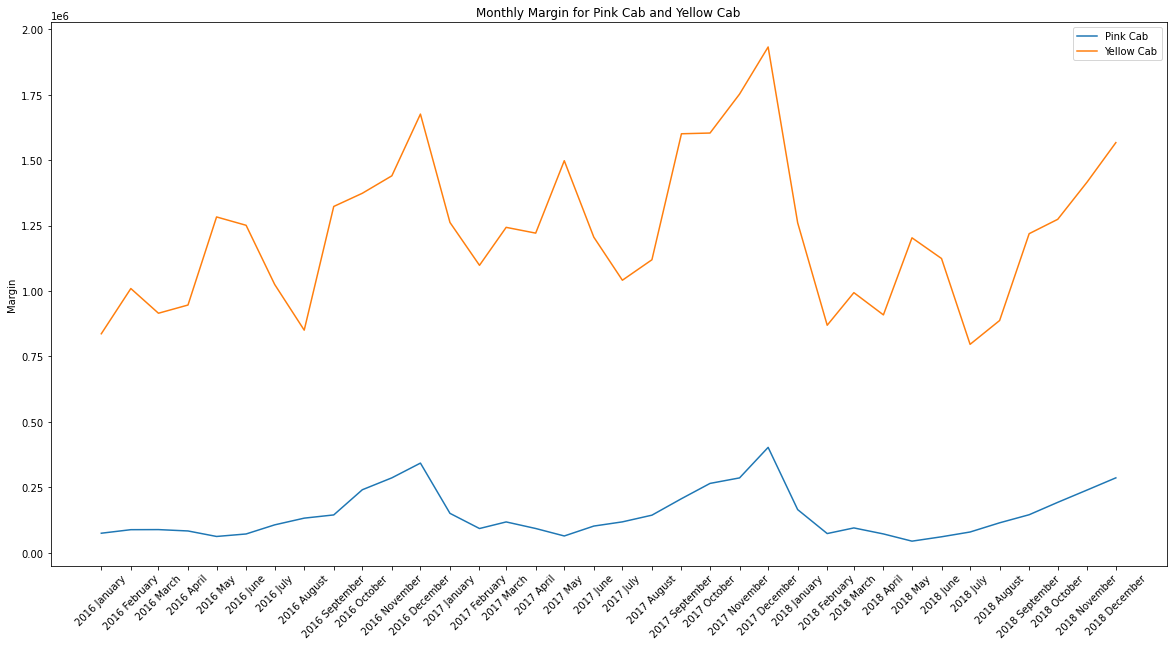

In [77]:
# Line chart of Max Margin for the Pink Cab and the Yellow Cab viewed in same x-axis showing the year and the months period

# Reshape the data
Margin_Cab = Margin_Cab.reset_index()

# Filter data for Pink Cab and Yellow Cab separately
pink_cab_data = Margin_Cab[Margin_Cab['Company'] == 'Pink Cab']
yellow_cab_data = Margin_Cab[Margin_Cab['Company'] == 'Yellow Cab']

# Combine Year and Month as a string in a new column
pink_cab_data['YearMonth'] = pink_cab_data['Year'].astype(str) + ' ' + pink_cab_data['Month']
yellow_cab_data['YearMonth'] = yellow_cab_data['Year'].astype(str) + ' ' + yellow_cab_data['Month']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Sort data by Year and Month
pink_cab_data['YearMonth'] = pd.to_datetime(pink_cab_data['YearMonth'], format='%Y %B')
yellow_cab_data['YearMonth'] = pd.to_datetime(yellow_cab_data['YearMonth'], format='%Y %B')
pink_cab_data = pink_cab_data.sort_values(by='YearMonth')
yellow_cab_data = yellow_cab_data.sort_values(by='YearMonth')

# Plot Pink Cab data
ax.plot(pink_cab_data['YearMonth'], pink_cab_data['Margin'], label='Pink Cab')

# Plot Yellow Cab data
ax.plot(yellow_cab_data['YearMonth'], yellow_cab_data['Margin'], label='Yellow Cab')

# Set x-axis labels
plt.xticks(rotation=45)
ax.set_xticks(pink_cab_data['YearMonth'])
ax.set_xticklabels(pink_cab_data['YearMonth'].dt.strftime('%Y %B'))

# Set y-axis label
ax.set_ylabel('Margin')

# Add a legend
ax.legend()

# Set the title
plt.title('Monthly Margin for Pink Cab and Yellow Cab')

plt.show()



In [78]:
# Find the maximum values and their positions
max_pink_margin = pink_cab_data['Margin'].max()
max_yellow_margin = yellow_cab_data['Margin'].max()

max_pink_month = pink_cab_data[pink_cab_data['Margin'] == max_pink_margin]['YearMonth'].iloc[0].strftime('%Y %B')
max_yellow_month = yellow_cab_data[yellow_cab_data['Margin'] == max_yellow_margin]['YearMonth'].iloc[0].strftime('%Y %B')

print(f"Max Pink Cab Margin: {round(max_pink_margin,2)}")
print(f"Max Yellow Cab Margin: {round(max_yellow_margin,2)}")
print(f"Max Pink Cab Month: {max_pink_month}")
print(f"Max Yellow Cab Month: {max_yellow_month}")

Max Pink Cab Margin: 402094.41
Max Yellow Cab Margin: 1932446.43
Max Pink Cab Month: 2017 December
Max Yellow Cab Month: 2017 December


**From the chart and the analysis carried out to ascertain the maximum monthly margin at a particular time period, we can see that the peak margin for Pink Cab of 402094 is 2017 December and the peak margin for the Yellow Cab of 1932446.43 is 2017 December.Also, the Yellow Cab margin is much more than the margin of the Pink Cab.**

### Does margin proportionally increase with increase in number of customers?

In [79]:
# Grouping the Master_data by Company, Year and Month and aggregating count of Customers for both companies
Customer_ID_Cab=Master_data.groupby(['Company','Year', 'Month']).Customer_ID.count()
Customer_ID_Cab

Company     Year  Month    
Pink Cab    2016  April         1240
                  August        2272
                  December      3521
                  February      1050
                  January        927
                               ...  
Yellow Cab  2018  March         6058
                  May           6243
                  November     11230
                  October       9727
                  September     9149
Name: Customer_ID, Length: 72, dtype: int64

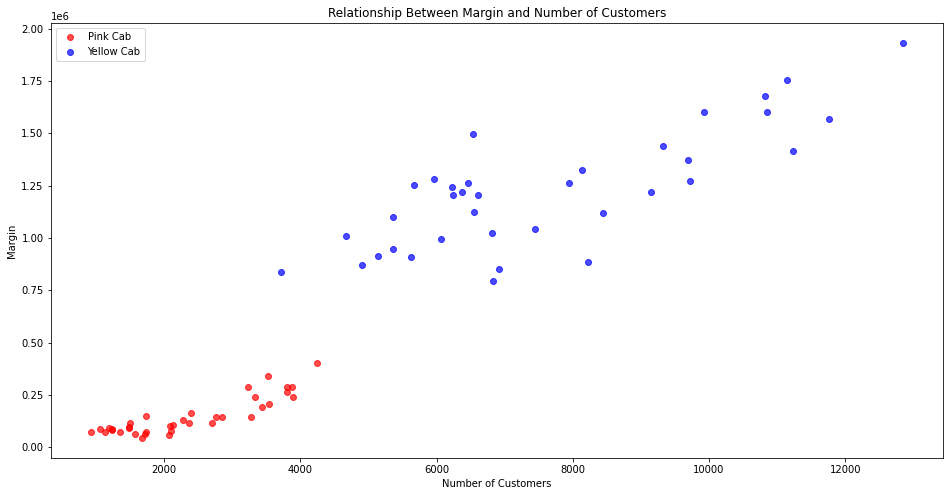

In [80]:
# Line chart of Margin vs Customer relationship for the Pink Cab and the Yellow Cab

# Reset the index to access the data easily
Margin_Cab = Margin_Cab.reset_index()
Customer_ID_Cab = Customer_ID_Cab.reset_index()

# Filter data for Pink Cab and Yellow Cab separately
pink_cab_data = Margin_Cab[Margin_Cab['Company'] == 'Pink Cab']
yellow_cab_data = Margin_Cab[Margin_Cab['Company'] == 'Yellow Cab']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(16, 8))

# Scatter plot for Pink Cab
ax.scatter(Customer_ID_Cab[Customer_ID_Cab['Company'] == 'Pink Cab']['Customer_ID'], pink_cab_data['Margin'],
           label='Pink Cab', color='red', alpha=0.7)

# Scatter plot for Yellow Cab
ax.scatter(Customer_ID_Cab[Customer_ID_Cab['Company'] == 'Yellow Cab']['Customer_ID'], yellow_cab_data['Margin'], 
           label='Yellow Cab', color='blue', alpha=0.7)

# Set labels and title
ax.set_xlabel('Number of Customers')
ax.set_ylabel('Margin')
plt.title('Relationship Between Margin and Number of Customers')

# Add a legend
ax.legend()

# Show the plot
plt.show()


**From the above chart, we can see that as number of customers increases, so is the margin. Also, the Yellow Cab customers has higher margin compared to Pink Cab customers.**

### What are the attributes of these customer segments?

In [81]:
# Grouping the Master_data by City to calculate number of users per city
Users_City = Master_data.groupby('City').Users.sum()
Users_City

City
ATLANTA GA        1.866655e+08
AUSTIN TX         7.333229e+07
BOSTON MA         2.375984e+09
CHICAGO IL        9.313000e+09
DALLAS TX         1.554757e+08
DENVER CO         4.751032e+07
LOS ANGELES CA    6.923092e+09
MIAMI FL          1.140744e+08
NASHVILLE TN      2.790270e+07
NEW YORK NY       3.018015e+10
ORANGE COUNTY     5.174211e+07
PHOENIX AZ        1.265851e+07
PITTSBURGH PA     4.783259e+06
SACRAMENTO CA     1.667315e+07
SAN DIEGO CA      1.434058e+09
SEATTLE WA        2.004288e+08
SILICON VALLEY    2.321172e+08
TUCSON AZ         1.102987e+07
WASHINGTON DC     5.554643e+09
Name: Users, dtype: float64

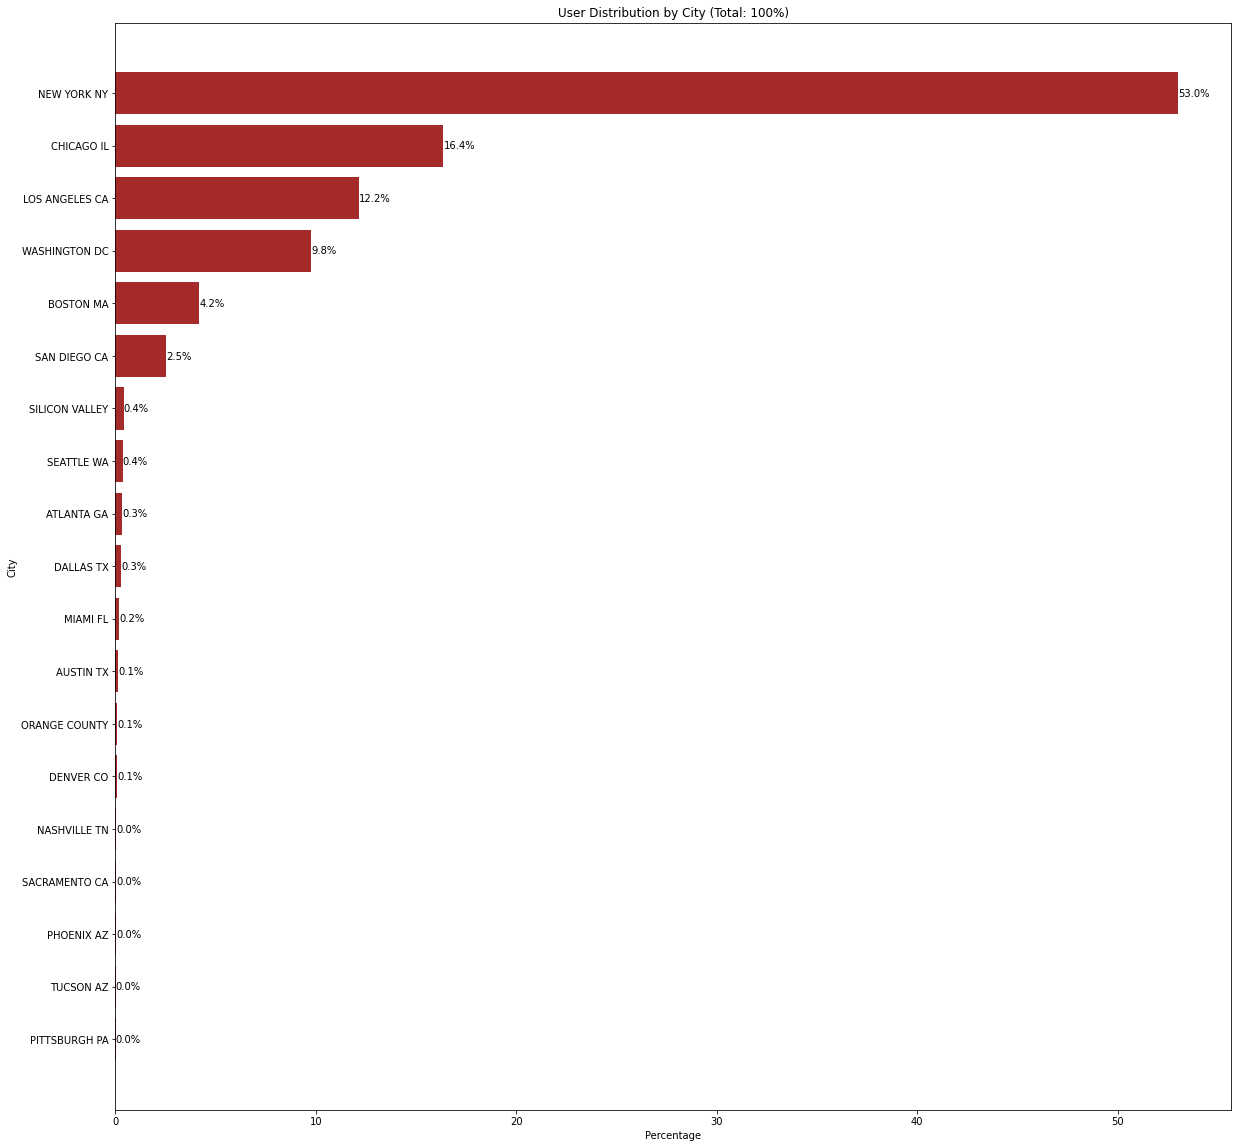

In [82]:
# Plotting a graph of "User Distribution by City" and sorting the data in ascending order
sorted_data = Users_City.sort_values(ascending=True)

# Extract the sorted labels and values
sorted_labels = sorted_data.index
sorted_values = sorted_data.values

# Normalize the sorted values to ensure the total is 100%
total = sum(sorted_values)
normalized_values = [(v / total) * 100 for v in sorted_values]

# Create a horizontal bar chart with brown bars
figb, axb = plt.subplots(figsize=(20, 20))
bars = axb.barh(sorted_labels, normalized_values, color='brown')

# Add correct percentage values within the bars
for bar in bars:
    width = bar.get_width()
    axb.annotate(f'{width:.1f}%', xy=(width, bar.get_y() + bar.get_height() / 2), ha='left', va='center')

plt.xlabel('Percentage')
plt.ylabel('City')
plt.title('User Distribution by City (Total: 100%)')

plt.show()


**From the Chart, we can see that the top three users by city are New York NY, Chicago IL and Los Angelis CA while the least three users per city are Phoenix AZ, Tucson AZ and Pitsburgh PA.** 

In [83]:
# Grouping the Master_data by City for Pink Cab to calculate number of users per city
Pink_Users = Master_data[Master_data.Company=='Pink Cab'].groupby('City').Users.sum()
Pink_Users

City
ATLANTA GA        4.352316e+07
AUSTIN TX         2.797890e+07
BOSTON MA         4.149889e+08
CHICAGO IL        1.539585e+09
DALLAS TX         3.057666e+07
DENVER CO         1.731487e+07
LOS ANGELES CA    2.863182e+09
MIAMI FL          3.538535e+07
NASHVILLE TN      1.706607e+07
NEW YORK NY       4.220115e+09
ORANGE COUNTY     1.965992e+07
PHOENIX AZ        5.298912e+06
PITTSBURGH PA     2.484526e+06
SACRAMENTO CA     9.396696e+06
SAN DIEGO CA      7.469866e+08
SEATTLE WA        6.847212e+07
SILICON VALLEY    1.034569e+08
TUCSON AZ         4.563888e+06
WASHINGTON DC     4.688877e+08
Name: Users, dtype: float64

In [84]:
# Grouping the Master_data by City for Yellow Cab to calculate number of users per city
Yellow_Users = Master_data[Master_data.Company=='Yellow Cab'].groupby('City').Users.sum()
Yellow_Users

City
ATLANTA GA        1.431423e+08
AUSTIN TX         4.535338e+07
BOSTON MA         1.960995e+09
CHICAGO IL        7.773416e+09
DALLAS TX         1.248990e+08
DENVER CO         3.019545e+07
LOS ANGELES CA    4.059910e+09
MIAMI FL          7.868910e+07
NASHVILLE TN      1.083663e+07
NEW YORK NY       2.596004e+10
ORANGE COUNTY     3.208219e+07
PHOENIX AZ        7.359600e+06
PITTSBURGH PA     2.298733e+06
SACRAMENTO CA     7.276452e+06
SAN DIEGO CA      6.870709e+08
SEATTLE WA        1.319567e+08
SILICON VALLEY    1.286603e+08
TUCSON AZ         6.465984e+06
WASHINGTON DC     5.085755e+09
Name: Users, dtype: float64

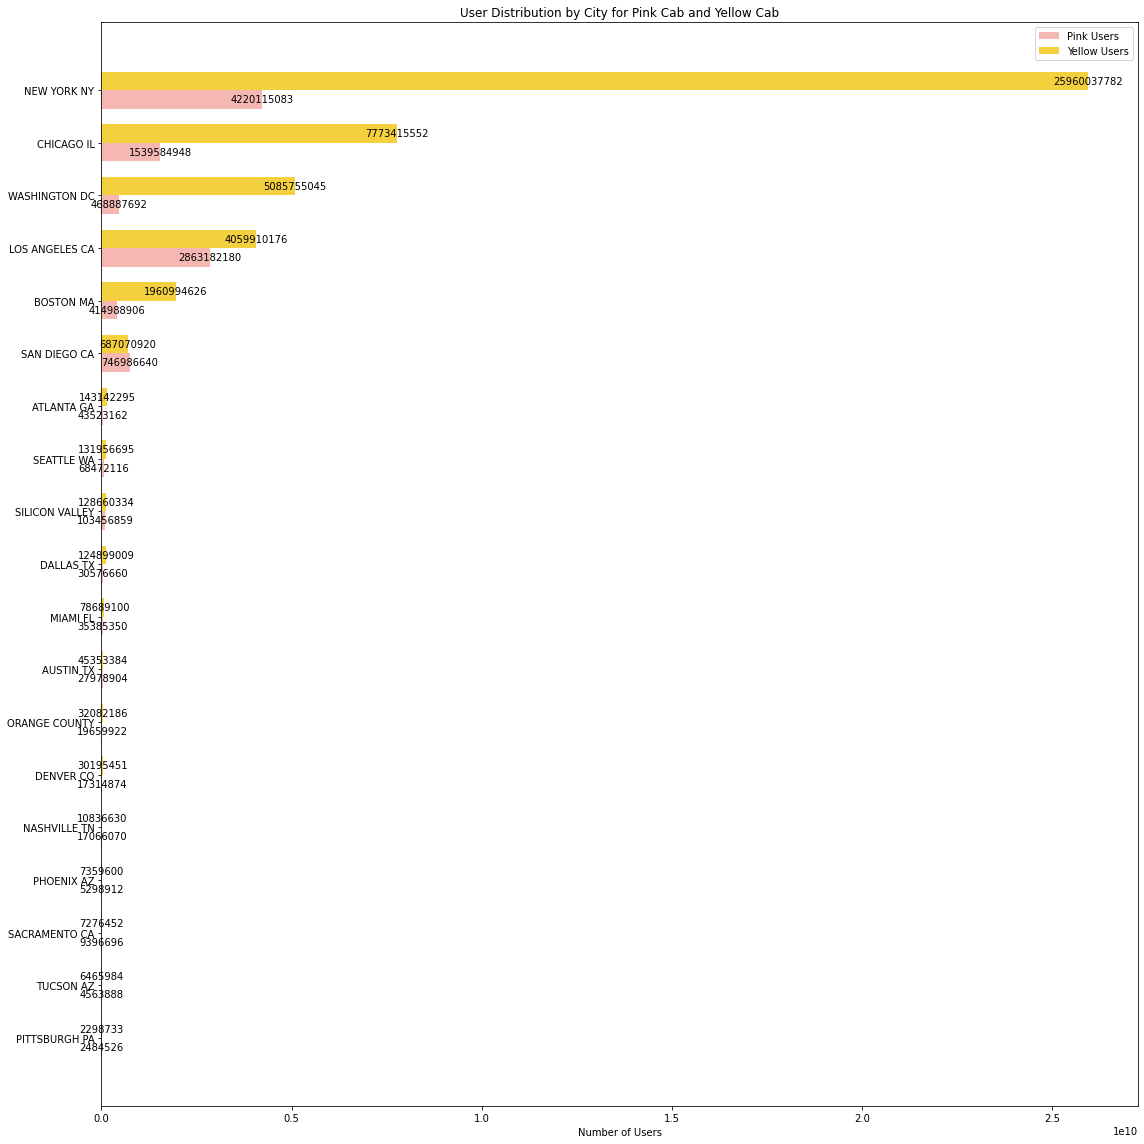

In [85]:
# Plotting a graph of "User Distribution by City" and sorting the data in ascending order for both Pink Cab and Yellow Cab

# Sort the data for Yellow_users in descending order
sorted_data_yellow = Yellow_Users.sort_values(ascending=True)

# Sort the data for Pink_users in ascending order and rearrange based on the Yellow_users order
sorted_data_pink = Pink_Users.reindex(index=sorted_data_yellow.index)

# Create a figure and subplot
fig, ax = plt.subplots(figsize=(16, 16))

# Set the width of the bars
bar_width = 0.35

# Create the positions for the bars
positions = range(len(sorted_data_pink))

# Plot the Pink_Users bars
bars1 = ax.barh(positions, sorted_data_pink, bar_width, label='Pink Users', color='#F5B7B1')

# Plot the Yellow_Users bars
bars2 = ax.barh([pos + bar_width for pos in positions], sorted_data_yellow, bar_width, label='Yellow Users', color='#F4D03F')

# Set the y-axis labels
ax.set_yticks([pos + bar_width / 2 for pos in positions])
ax.set_yticklabels(sorted_data_pink.index)

# Set the x-axis label
ax.set_xlabel('Number of Users')
ax.set_title('User Distribution by City for Pink Cab and Yellow Cab')

# Add values as labels at the end of each bar
for i, bar in enumerate(bars1):
    ax.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())), ha='center', va='center')

for i, bar in enumerate(bars2):
    ax.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())), ha='center', va='center')

# Add a legend
ax.legend()

plt.tight_layout()
plt.show()


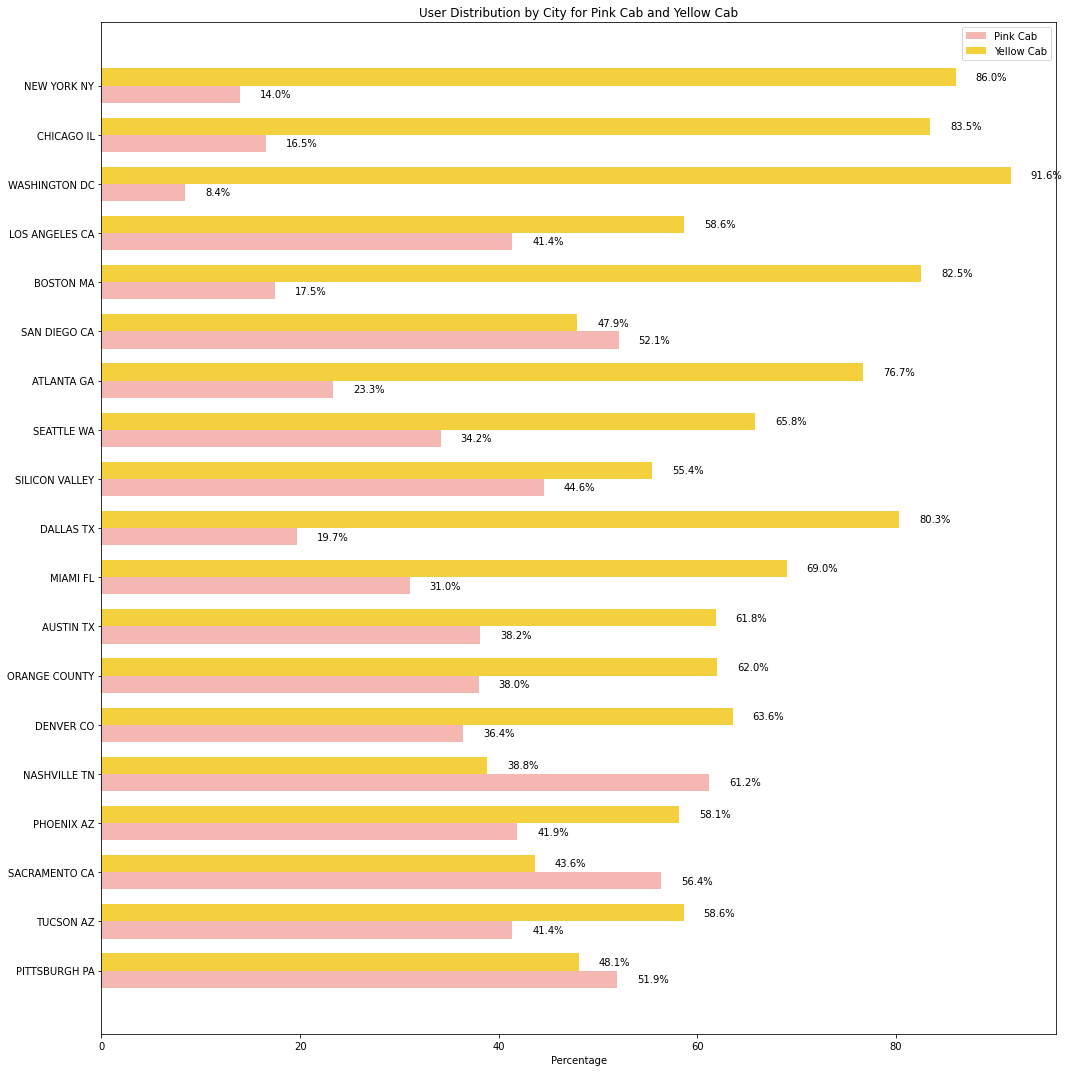

In [86]:
# Plotting the same graph above but showing the distribution in percentage of Users for the Pink Cab and Yellow Cab

# Sort the data for Yellow_users in ascending order
sorted_data_yellow = Yellow_Users.sort_values(ascending=True)

# Sort the data for Pink_users in ascending order and rearrange based on the Yellow_users order
sorted_data_pink = Pink_Users.reindex(index=sorted_data_yellow.index)

# Create a figure and subplot
fig, ax = plt.subplots(figsize=(15, 15))

# Set the width of the bars
bar_width = 0.35

# Create the positions for the bars
positions = range(len(sorted_data_pink))

# Initialize a variable to track the current city
current_city = None

# Plot the bars for each city
for i, (pink_users, yellow_users) in enumerate(zip(sorted_data_pink, sorted_data_yellow)):
    if Pink_Users.index[i] != current_city:
        current_city = Pink_Users.index[i]
        total_users = pink_users + yellow_users
    percentage_pink = (pink_users / total_users) * 100
    percentage_yellow = (yellow_users / total_users) * 100

    # Plot the Pink_Users bars
    bars1 = ax.barh(i, percentage_pink, bar_width, label='Pink Users', color='#F5B7B1')
    
    # Plot the Yellow_Users bars
    bars2 = ax.barh(i + bar_width, percentage_yellow, bar_width, label='Yellow Users', color='#F4D03F')
    
    # Add percentage labels on the Pink Cab bars
    ax.text(percentage_pink + 2, i, f'{percentage_pink:.1f}%', va='center')
    
    # Add percentage labels on the Yellow Cab bars
    ax.text(percentage_yellow + 2, i + bar_width, f'{percentage_yellow:.1f}%', va='center')

# Set the y-axis labels
ax.set_yticks([pos + bar_width / 2 for pos in positions])
ax.set_yticklabels(sorted_data_pink.index)

# Set the x-axis label
ax.set_xlabel('Percentage')
ax.set_title('User Distribution by City for Pink Cab and Yellow Cab')

# Add a legend
ax.legend(['Pink Cab', 'Yellow Cab'])

plt.tight_layout()
plt.show()

**From the above chart, we can see that yellow Cab has more users than Pink Cab in most of the cities except for few cities such as San diego CA, Nashville TN, Sacramento CA and Pittsburgh PA. For Cities like New York NA, Chicago IL, Washington DC, Boston MA and Dallas TX, the Yellow Cab users are more than three times higher than Pink Cab users which makes a whole lot of difference between them.**

In [87]:
# Grouping the Master_data by City for Pink Cab to calculate number of Transactions per city
Pink_Transaction_ID = Master_data[Master_data.Company=='Pink Cab'].groupby('City').Transaction_ID.count()
Pink_Transaction_ID

City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Transaction_ID, dtype: int64

In [88]:
# Grouping the Master_data by City for Yellow Cab to calculate number of Transaction ID per city
Yellow_Transaction_ID = Master_data[Master_data.Company=='Yellow Cab'].groupby('City').Transaction_ID.count()
Yellow_Transaction_ID

City
ATLANTA GA         5795
AUSTIN TX          3028
BOSTON MA         24506
CHICAGO IL        47264
DALLAS TX          5637
DENVER CO          2431
LOS ANGELES CA    28168
MIAMI FL           4452
NASHVILLE TN       1169
NEW YORK NY       85918
ORANGE COUNTY      2469
PHOENIX AZ         1200
PITTSBURGH PA       631
SACRAMENTO CA      1033
SAN DIEGO CA       9816
SEATTLE WA         5265
SILICON VALLEY     4722
TUCSON AZ          1132
WASHINGTON DC     40045
Name: Transaction_ID, dtype: int64

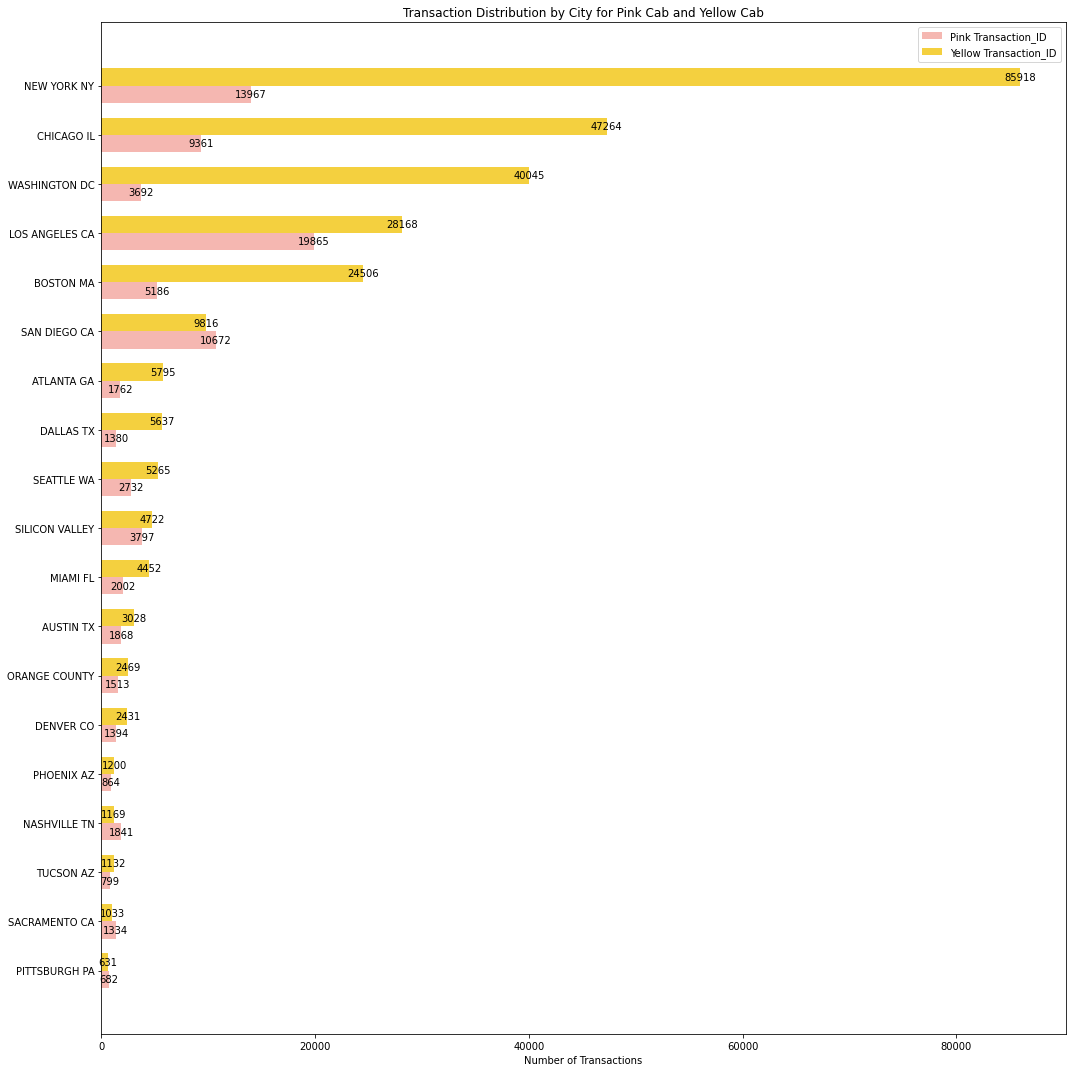

In [89]:
# Plotting a graph of "Transaction Distribution by City" and sorting the data in ascending order for both Pink Cab and Yellow Cab

# Sort the data for Yellow_users in ascending order
sorted_data_yellow = Yellow_Transaction_ID.sort_values(ascending=True)

# Sort the data for Pink_users in ascending order and rearrange based on the Yellow_users order
sorted_data_pink = Pink_Transaction_ID.reindex(index=sorted_data_yellow.index)

# Create a figure and subplot
fig, ax = plt.subplots(figsize=(15, 15))

# Set the width of the bars
bar_width = 0.35

# Create the positions for the bars
positions = range(len(sorted_data_pink))

# Plot the Pink_Users bars
bars1 = ax.barh(positions, sorted_data_pink, bar_width, label='Pink Transaction_ID', color='#F5B7B1')

# Plot the Yellow_Users bars
bars2 = ax.barh([pos + bar_width for pos in positions], sorted_data_yellow, bar_width, label='Yellow Transaction_ID', color='#F4D03F')

# Set the y-axis labels
ax.set_yticks([pos + bar_width / 2 for pos in positions])
ax.set_yticklabels(sorted_data_pink.index)

# Set the x-axis label
ax.set_xlabel('Number of Transactions')
ax.set_title('Transaction Distribution by City for Pink Cab and Yellow Cab')

# Add values as labels at the end of each bar
for i, bar in enumerate(bars1):
    ax.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())), ha='center', va='center')

for i, bar in enumerate(bars2):
    ax.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())), ha='center', va='center')

# Add a legend
ax.legend()

plt.tight_layout()
plt.show()


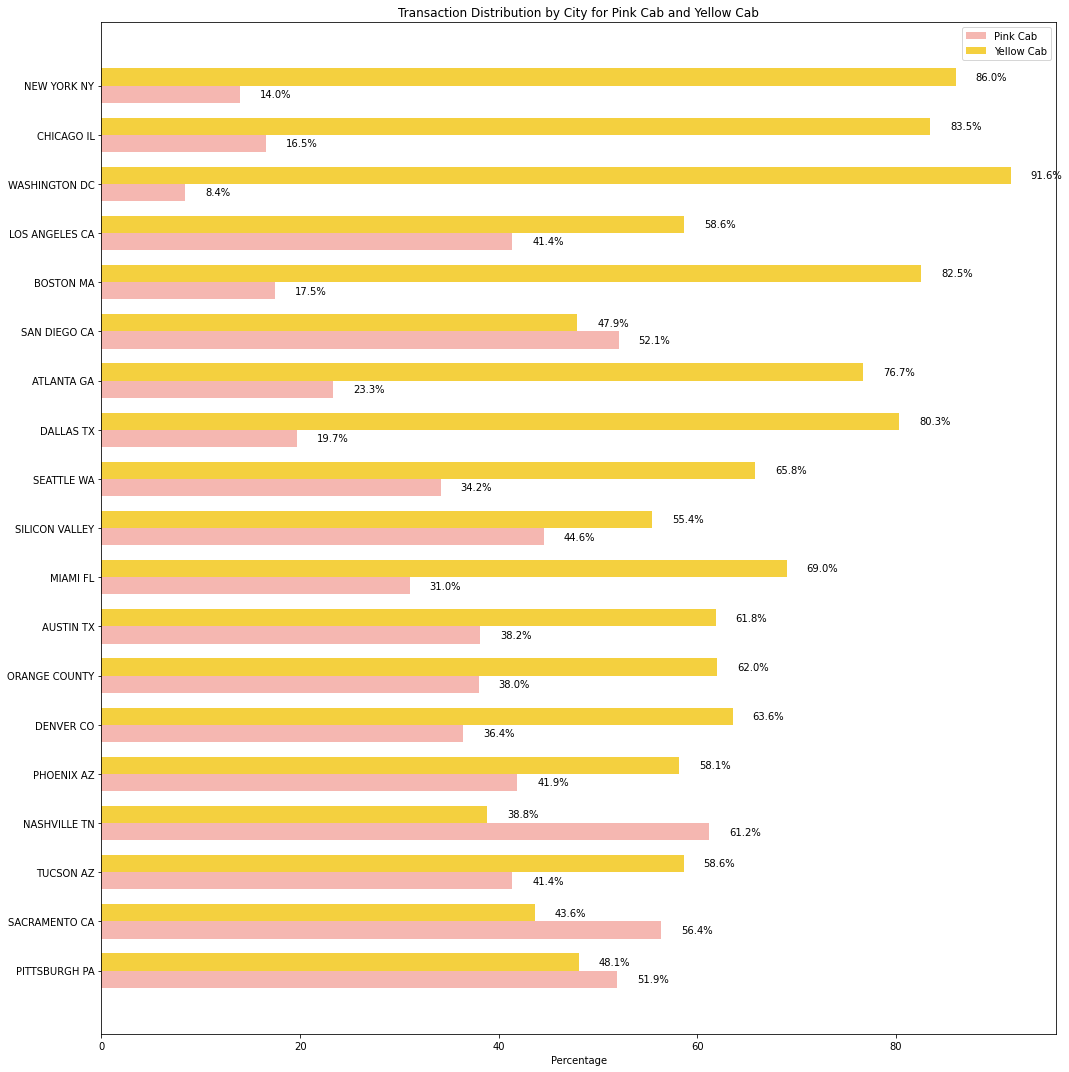

In [90]:
# Plotting the same graph above but showing the distribution in percentage of Transactions for the Pink Cab and Yellow Cab

# Sort the data for Yellow_Transaction_ID in ascending order
sorted_data_yellow = Yellow_Transaction_ID.sort_values(ascending=True)

# Sort the data for Pink_Transaction_ID in ascending order and rearrange based on the Yellow_users order
sorted_data_pink = Pink_Transaction_ID.reindex(index=sorted_data_yellow.index)

# Create a figure and subplot
fig, ax = plt.subplots(figsize=(15, 15))

# Set the width of the bars
bar_width = 0.35

# Create the positions for the bars
positions = range(len(sorted_data_pink))

# Initialize a variable to track the current city
current_city = None

# Plot the bars for each city
for i, (pink_transid, yellow_transid) in enumerate(zip(sorted_data_pink, sorted_data_yellow)):
    if Pink_Transaction_ID.index[i] != current_city:
        current_city = Pink_Transaction_ID.index[i]
        total_transid = pink_transid + yellow_transid
    percentage_pink = (pink_transid / total_transid) * 100
    percentage_yellow = (yellow_transid / total_transid) * 100

    # Plot the Pink_Transaction_ID bars
    bars1 = ax.barh(i, percentage_pink, bar_width, label='Pink Transaction_ID', color='#F5B7B1')
    
    # Plot the Yellow_Transaction_ID bars
    bars2 = ax.barh(i + bar_width, percentage_yellow, bar_width, label='Yellow Transaction_ID', color='#F4D03F')
    
    # Add percentage labels on the Pink Cab bars
    ax.text(percentage_pink + 2, i, f'{percentage_pink:.1f}%', va='center')
    
    # Add percentage labels on the Yellow Cab bars
    ax.text(percentage_yellow + 2, i + bar_width, f'{percentage_yellow:.1f}%', va='center')

# Set the y-axis labels
ax.set_yticks([pos + bar_width / 2 for pos in positions])
ax.set_yticklabels(sorted_data_pink.index)

# Set the x-axis label
ax.set_xlabel('Percentage')
ax.set_title('Transaction Distribution by City for Pink Cab and Yellow Cab')

# Add a legend
ax.legend(['Pink Cab', 'Yellow Cab'])

plt.tight_layout()
plt.show()

**The above charts clarifies that Transaction for Yellow Cab compared to Pink Cab in general which is similar that of the users comparison charts**

In [91]:
# Grouping the Master_data by Gender for Pink Cab to calculate amount of Price_Charged per gender
gender_pink=Master_data[Master_data.Company=='Pink Cab'].groupby('Gender').Price_Charged.sum()
gender_pink

Gender
Female    11642218.36
Male      14686032.97
Name: Price_Charged, dtype: float64

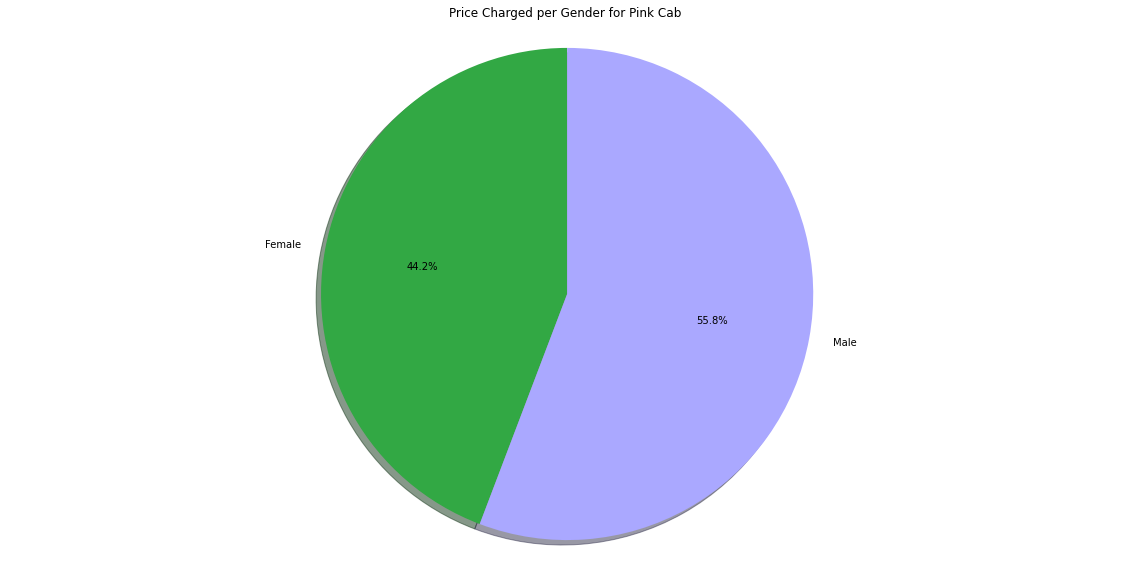

In [92]:
# Pie Chart showing 'Price Charged per Gender for Pink Cab'

# Data for the pie chart
labels = gender_pink.index
values = gender_pink.values

colors = ['#32a844', '#aaa8ff']  # Assign blue to male and green to female

# Create the pie chart
figpink, axpink = plt.subplots(figsize=(20,10))
axpink.pie(values , labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
axpink.axis('equal')

plt.title('Price Charged per Gender for Pink Cab')
plt.show()

In [93]:
# Grouping the Master_data by Gender for Yellow Cab to calculate amount of Price_Charged per gender
gender_yellow=Master_data[Master_data.Company=='Yellow Cab'].groupby('Gender').Price_Charged.sum()
gender_yellow

Gender
Female    5.273030e+07
Male      7.312359e+07
Name: Price_Charged, dtype: float64

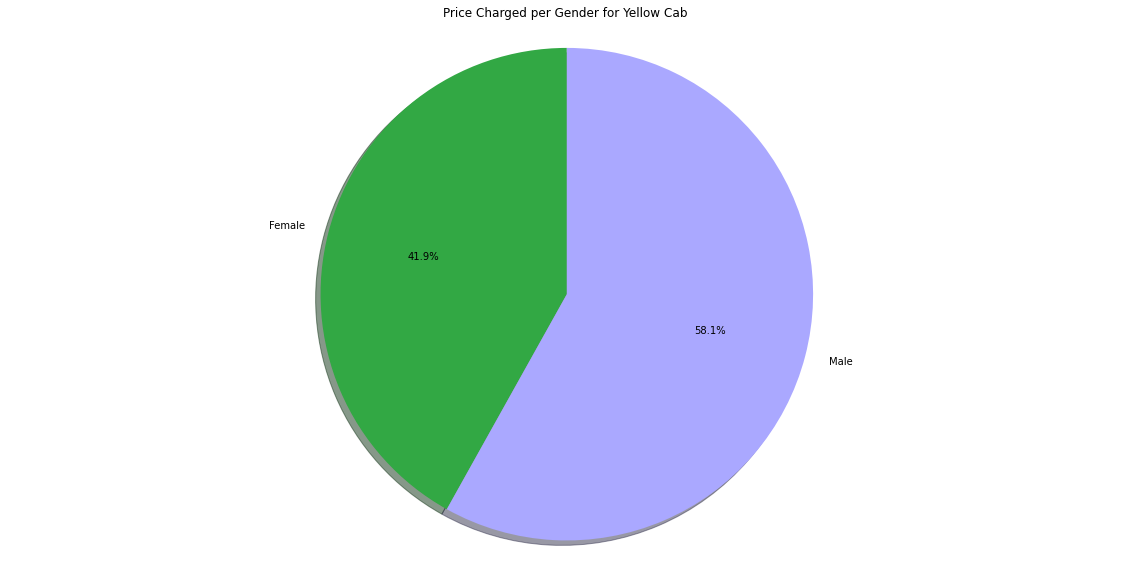

In [94]:
# Pie Chart showing 'Price_Charged per Gender for Yellow Cab'

# Data for the pie chart
labels = gender_yellow.index
values = gender_yellow.values

colors = ['#32a844', '#aaa8ff']  # Assign blue to male and green to female

# Create the pie chart
figyellow, axyellow = plt.subplots(figsize=(20,10))
axyellow.pie(values , labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors = colors)
axyellow.axis('equal')

plt.title('Price Charged per Gender for Yellow Cab')
plt.show()

**From the above pie charts, We can see from gender perspective that generally male customers petronize the most for both Pink Cab and Yellow Cab**

In [95]:
# Grouping the Master_data by Company and Gender for both Pink and Yellow Cab using Customer_ID
Gender_Cab=Master_data.groupby(['Company','Gender']).Customer_ID.nunique()
Gender_Cab

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer_ID, dtype: int64

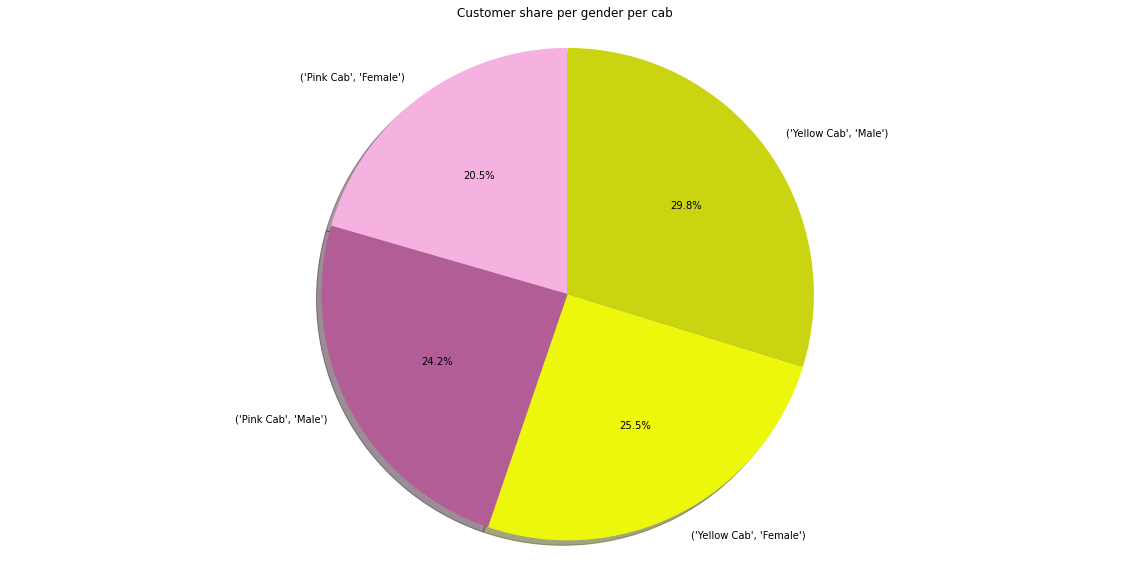

In [96]:
# Pie Chart showing 'Company and Gender distribution among Pink Cab and Yellow Cab customers'

# Data for the pie chart
labels = Gender_Cab.index
values = Gender_Cab.values

colors = ['#f5b1df', '#b35d97', '#ecf70c', '#cad411']  # Assign colours for both Pink Cab and Yellow Cab

figp, axp = plt.subplots(figsize=(20,10))
axp.pie(values , labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
axp.axis('equal')

plt.title('Customer share per gender per cab')
plt.show()

**From the above pie chart showing percentage distribution between company and gender for the two businesses, we can see that the male and female customers for Yellow Cab are more than that of the corresponding gender for Pink Cab.**

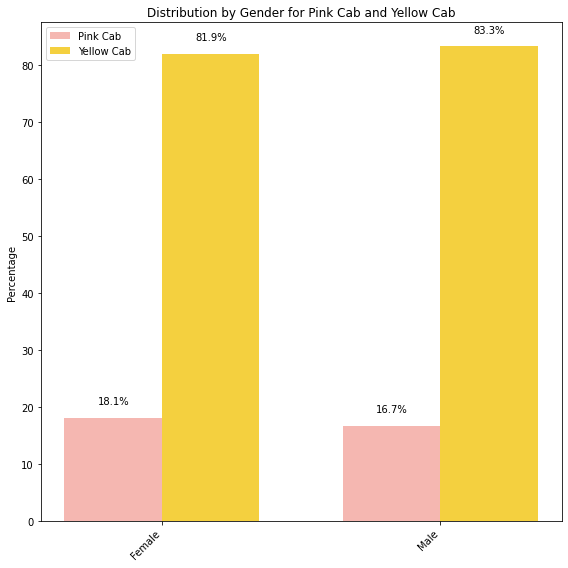

In [120]:
# Plotting the distribution in percentage of gender for the Pink Cab and Yellow Cab
# Sort the data for Yellow_gender in ascending order
sorted_data_yellow = gender_yellow.sort_values(ascending=True)

# Sort the data for Pink_gender in ascending order and rearrange based on the Yellow_users order
sorted_data_pink = gender_pink.reindex(index=sorted_data_yellow.index)

# Create a figure and subplot
fig, ax = plt.subplots(figsize=(8, 8))

# Set the width of the bars
bar_width = 0.35

# Create the positions for the bars
positions = range(len(sorted_data_pink))

# Initialize a variable to track the current city
current_gender = None

# Plot the bars for each city
for i, (pink_gender, yellow_gender) in enumerate(zip(sorted_data_pink, sorted_data_yellow)):
    if gender_pink.index[i] != current_gender:
        current_gender = gender_pink.index[i]
        total_gender = pink_gender + yellow_gender
    percentage_pink = (pink_gender / total_gender) * 100
    percentage_yellow = (yellow_gender / total_gender) * 100

    # Plot the Pink_Transaction_ID bars
    bars1 = ax.bar(i, percentage_pink, bar_width, label='Pink Gender', color='#F5B7B1')
    
    # Plot the Yellow_Transaction_ID bars
    bars2 = ax.bar(i + bar_width, percentage_yellow, bar_width, label='Yellow Gender', color='#F4D03F')
    
    # Add percentage labels on the Pink Cab bars
    ax.text(i, percentage_pink + 2, f'{percentage_pink:.1f}%', ha='center', va='bottom')
    
    # Add percentage labels on the Yellow Cab bars
    ax.text(i + bar_width, percentage_yellow + 2, f'{percentage_yellow:.1f}%', ha='center', va='bottom')

# Set the x-axis labels
ax.set_xticks([pos + bar_width / 2 for pos in positions])
ax.set_xticklabels(sorted_data_pink.index, rotation=45, ha='right')

# Set the y-axis label
ax.set_ylabel('Percentage')
ax.set_title('Distribution by Gender for Pink Cab and Yellow Cab')

# Add a legend
ax.legend(['Pink Cab', 'Yellow Cab'])

plt.tight_layout()
plt.show()


**From the above bar chart, the Yellow Cab are about 4 times higher than Pink Cab in terms of Priced_Charged for both male and female customers. This shows that the Yellow Cab are more patronized than Pink Cab**

In [98]:
# Getting the Max and Min of the 'Age' field
max_age = max(Master_data['Age'])
min_age = min(Master_data['Age'])
print(f"The maximum age is: {max_age}")
print(f"The minimum age is: {min_age}")

The maximum age is: 65
The minimum age is: 18


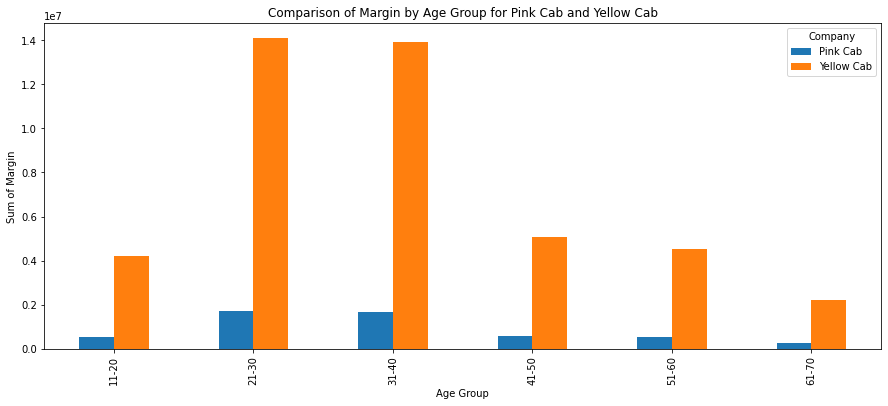

In [99]:
# Define age groups and labels
age_bins = [10, 20, 30, 40, 50, 60, 100]
age_labels = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70']

# Create Age Group column
Master_data['Age_Group'] = pd.cut(Master_data['Age'], bins=age_bins, labels=age_labels)

# Grouping the Master_data by Age Group and Company to calculate the sum of Margin
age_margin = Master_data.groupby(['Age_Group', 'Company'])['Margin'].sum().unstack()

# Plot the bar chart
ax = age_margin.plot(kind='bar', figsize=(15, 6,))

# Set labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Sum of Margin')
ax.set_title('Comparison of Margin by Age Group for Pink Cab and Yellow Cab')

# Customize the legend
ax.legend(title='Company', labels=['Pink Cab', 'Yellow Cab'])

plt.show()


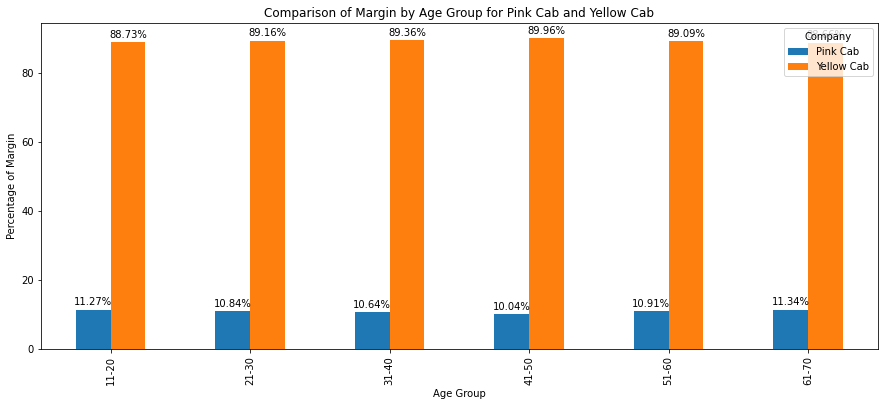

In [100]:
# Normalize data to percentage within each age group
age_margin_percentage = age_margin.div(age_margin.sum(axis=1), axis=0) * 100

# Plot the grouped bar chart
ax = age_margin_percentage.plot(kind='bar', figsize=(15 , 6))

# Set labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Percentage of Margin')
ax.set_title('Comparison of Margin by Age Group for Pink Cab and Yellow Cab')

# Customize the legend
ax.legend(title='Company', labels=['Pink Cab', 'Yellow Cab'])

#8 Add percentage values on top of the bars
for i, bar in enumerate(ax.containers):
    for rect in bar:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom')

plt.show()


**From the above charts, we can see that customers within the age range of 21-40 are generally patronizing the Cab business more than customers from other age groups for both Pink Cab and Yellow Cab. However, when comparing both companies, the Yellow Cab customers for different age groups patronize more than 7 times the Pink Cab customers making Yellow Cab a more suitable business for investment.** 

In [103]:
# Getting the Max and Min of the 'Income' field
max_income = max(Master_data['Income'])
min_income = min(Master_data['Income'])
print(f"The maximum income is: {max_income}")
print(f"The minimum income is: {min_income}")

The maximum income is: 35000
The minimum income is: 2000


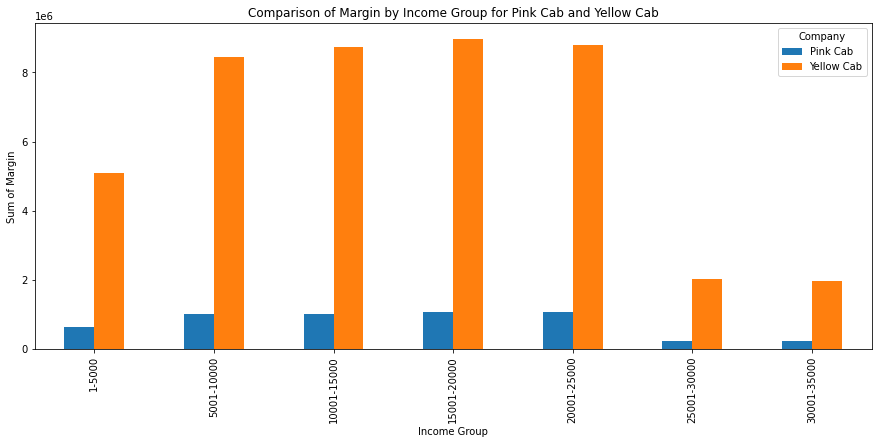

In [108]:
# Define income groups and labels
income_bins = [1000, 5000, 10000, 15000, 20000, 25000, 30000, 50000]
income_labels = ['1-5000', '5001-10000', '10001-15000', '15001-20000', '20001-25000', '25001-30000', '30001-35000']

# Create Income Group column
Master_data['Income_Group'] = pd.cut(Master_data['Income'], bins=income_bins, labels=income_labels)

# Grouping the Master_data by Income Group and Company to calculate the sum of Margin
income_margin = Master_data.groupby(['Income_Group', 'Company'])['Margin'].sum().unstack()

# Plot the bar chart
ax = income_margin.plot(kind='bar', figsize=(15, 6,))

# Set labels and title
ax.set_xlabel('Income Group')
ax.set_ylabel('Sum of Margin')
ax.set_title('Comparison of Margin by Income Group for Pink Cab and Yellow Cab')

# Customize the legend
ax.legend(title='Company', labels=['Pink Cab', 'Yellow Cab'])

plt.show()


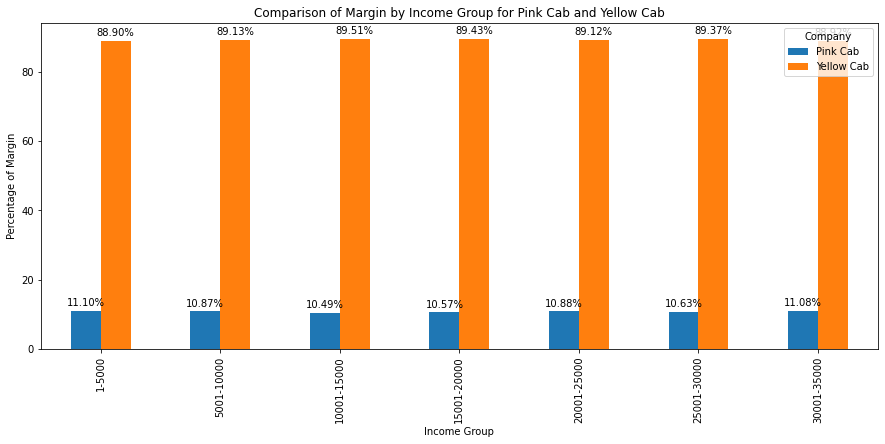

In [111]:
# Normalize data to percentage within each age group
income_margin_percentage = income_margin.div(income_margin.sum(axis=1), axis=0) * 100

# Plot the grouped bar chart
ax = income_margin_percentage.plot(kind='bar', figsize=(15 , 6))

# Set labels and title
ax.set_xlabel('Income Group')
ax.set_ylabel('Percentage of Margin')
ax.set_title('Comparison of Margin by Income Group for Pink Cab and Yellow Cab')

# Customize the legend
ax.legend(title='Company', labels=['Pink Cab', 'Yellow Cab'])

#8 Add percentage values on top of the bars
for i, bar in enumerate(ax.containers):
    for rect in bar:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom')

plt.show()


**From the above charts, we can see that customers earning within 5001 and 25000 are generally patronizing the Cab business more than customers from other income groups for both Pink Cab and Yellow Cab. However, when comparing both companies, the Yellow Cab customers for different income groups patronize more than 7 times the Pink Cab customers making Yellow Cab a more suitable business for investment.** 

In [112]:
# Grouping the Master_data by Payment_Mode for Pink Cab to calculate amount of Price_Charged per payment mode
payment_pink=Master_data[Master_data.Company=='Pink Cab'].groupby('Payment_Mode').Price_Charged.sum()
payment_pink

Payment_Mode
Card    15783616.83
Cash    10544634.50
Name: Price_Charged, dtype: float64

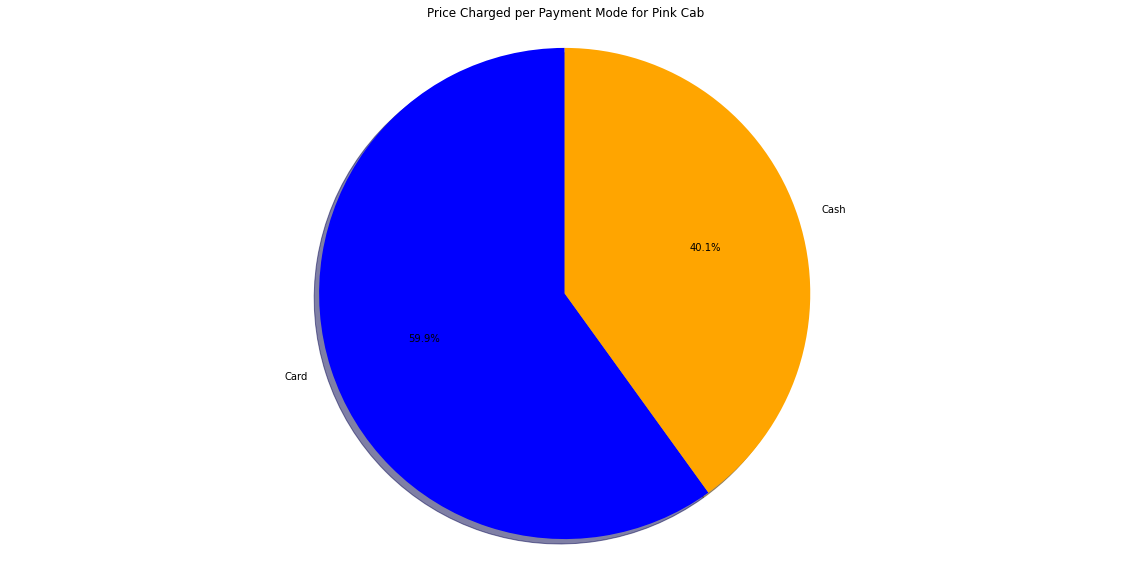

In [114]:
# Pie Chart showing 'Price Charged per Gender for Pink Cab'

# Data for the pie chart
labels = payment_pink.index
values = payment_pink.values

colors = ['blue', 'orange']  # Assign blue to card and orange to cash

# Create the pie chart
figpink, axpink = plt.subplots(figsize=(20,10))
axpink.pie(values , labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
axpink.axis('equal')

plt.title('Price Charged per Payment Mode for Pink Cab')
plt.show()

In [115]:
# Grouping the Master_data by Payment_Mode for Yellow Cab to calculate amount of Price_Charged per payment mode
payment_yellow=Master_data[Master_data.Company=='Yellow Cab'].groupby('Payment_Mode').Price_Charged.sum()
payment_yellow

Payment_Mode
Card    7.545917e+07
Cash    5.039472e+07
Name: Price_Charged, dtype: float64

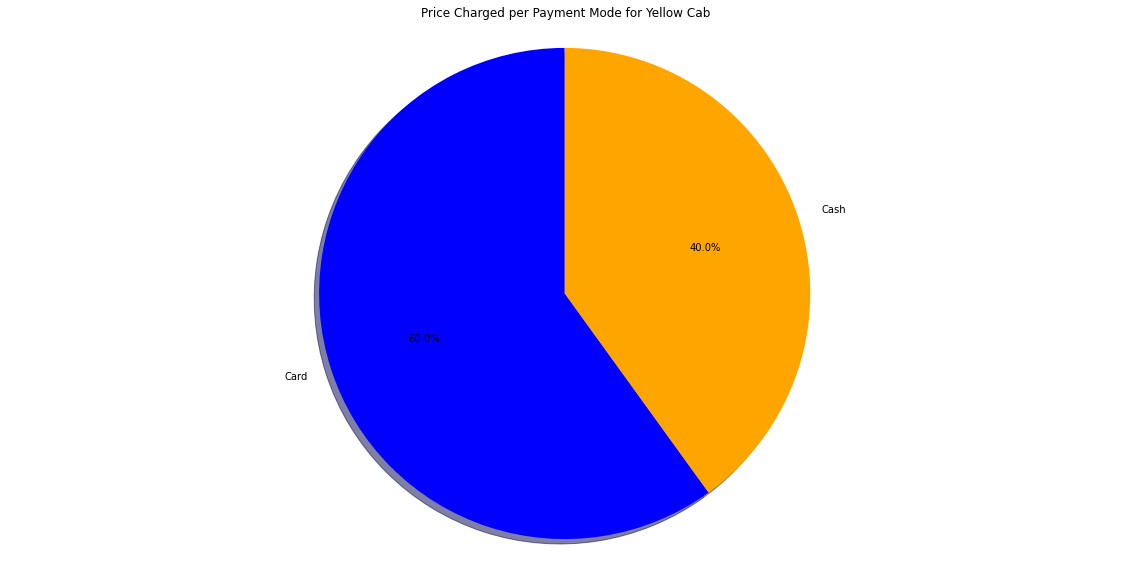

In [117]:
# Pie Chart showing 'Price Charged per Gender for Yellow Cab'

# Data for the pie chart
labels = payment_yellow.index
values = payment_yellow.values

colors = ['blue', 'orange']  # Assign blue to card and orange to cash

# Create the pie chart
figpink, axpink = plt.subplots(figsize=(20,10))
axpink.pie(values , labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
axpink.axis('equal')

plt.title('Price Charged per Payment Mode for Yellow Cab')
plt.show()

**From the above pie charts, We can see from payment mode perspective that generally card customers petronize the most for both Pink Cab and Yellow Cab**

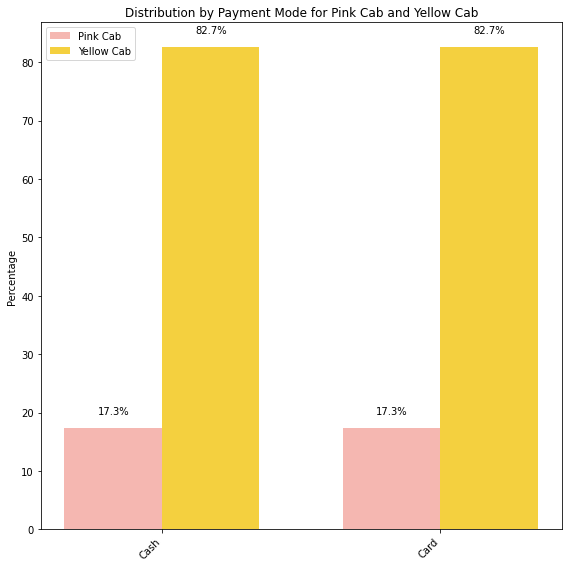

In [119]:
# Plotting the distribution in percentage of payment mode for the Pink Cab and Yellow Cab
# Sort the data for Yellow payment mode in ascending order
sorted_data_yellow = payment_yellow.sort_values(ascending=True)

# Sort the data for Pink_gender in ascending order and rearrange based on the Yellow_users order
sorted_data_pink = payment_pink.reindex(index=sorted_data_yellow.index)

# Create a figure and subplot
fig, ax = plt.subplots(figsize=(8, 8))

# Set the width of the bars
bar_width = 0.35

# Create the positions for the bars
positions = range(len(sorted_data_pink))

# Initialize a variable to track the current city
current_payment = None

# Plot the bars for each city
for i, (pink_payment, yellow_payment) in enumerate(zip(sorted_data_pink, sorted_data_yellow)):
    if payment_pink.index[i] != current_payment:
        current_payment = payment_pink.index[i]
        total_payment = pink_payment + yellow_payment
    percentage_pink = (pink_payment / total_payment) * 100
    percentage_yellow = (yellow_payment / total_payment) * 100

    # Plot the Pink_Transaction_ID bars
    bars1 = ax.bar(i, percentage_pink, bar_width, label='Pink Payment Mode', color='#F5B7B1')
    
    # Plot the Yellow_Transaction_ID bars
    bars2 = ax.bar(i + bar_width, percentage_yellow, bar_width, label='Yellow Payment Mode', color='#F4D03F')
    
    # Add percentage labels on the Pink Cab bars
    ax.text(i, percentage_pink + 2, f'{percentage_pink:.1f}%', ha='center', va='bottom')
    
    # Add percentage labels on the Yellow Cab bars
    ax.text(i + bar_width, percentage_yellow + 2, f'{percentage_yellow:.1f}%', ha='center', va='bottom')

# Set the x-axis labels
ax.set_xticks([pos + bar_width / 2 for pos in positions])
ax.set_xticklabels(sorted_data_pink.index, rotation=45, ha='right')

# Set the y-axis label
ax.set_ylabel('Percentage')
ax.set_title('Distribution by Payment Mode for Pink Cab and Yellow Cab')

# Add a legend
ax.legend(['Pink Cab', 'Yellow Cab'])

plt.tight_layout()
plt.show()


**From the above bar chart, the Yellow Cab are about 4 times higher than Pink Cab in terms of Priced_Charged for both cash and card customers. This shows that the Yellow Cab are more petronized than Pink Cab**

In [121]:
# The final Master_data Dataset looks like the below; 
Master_data.sample(10)                  

,Transaction_ID,Customer_ID,City,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income,Population,Users,Margin,Age_Group,Income_Group
192529,10236635,13868,SILICON VALLEY,Yellow Cab,18.90,540.02,244.9440,October,2017,Cash,Male,35,24148,1177609,27247,295.0760,31-40,20001-25000
163786,10202107,53511,WASHINGTON DC,Yellow Cab,39.78,627.64,510.7752,July,2017,Cash,Male,34,14397,418859,127001,116.8648,31-40,10001-15000
308562,10378909,5779,CHICAGO IL,Yellow Cab,18.08,249.89,234.3168,September,2018,Cash,Male,42,13913,1955130,164468,15.5732,41-50,10001-15000
9018,10011510,5921,CHICAGO IL,Yellow Cab,37.24,711.15,464.7552,February,2016,Cash,Male,34,2083,1955130,164468,246.3948,31-40,1-5000
219426,10268536,1422,NEW YORK NY,Yellow Cab,23.75,455.10,339.1500,December,2017,Cash,Male,38,16656,8405837,302149,115.9500,31-40,15001-20000
188684,10231865,301,NEW YORK NY,Yellow Cab,11.44,276.71,141.3984,September,2017,Card,Male,62,25038,8405837,302149,135.3116,61-70,25001-30000
239835,10293051,58235,BOSTON MA,Pink Cab,34.80,333.55,372.3600,January,2018,Card,Male,45,22811,248968,80021,-38.8100,41-50,20001-25000
1371,10001823,57820,BOSTON MA,Yellow Cab,4.68,64.00,56.1600,January,2016,Cash,Male,26,13113,248968,80021,7.8400,21-30,10001-15000
330969,10405667,10003,MIAMI FL,Yellow Cab,8.24,136.74,99.8688,November,2018,Cash,Female,24,23549,1339155,17675,36.8712,21-30,20001-25000
30546,10038843,29207,ATLANTA GA,Yellow Cab,26.73,737.50,352.8360,May,2016,Card,Female,30,2908,814885,24701,384.6640,21-30,1-5000


## EDA Summary
### Feature Understanding:
The EDA revealed that Yellow Cab consistently covers longer travel distances than Pink Cab, with notable disparities during peak seasons. Both companies tend to operate within a similar range of distances, roughly 2 to 48 kilometers. Additionally, price charged for Yellow Cab is generally higher than for Pink Cab, with a positive correlation observed between distance traveled and price charged. This feature understanding can be pivotal in assessing market dynamics and pricing strategies for the investment decision.

### Attributes of Customer Segments:
The analysis of customer segments based on gender, age, income, and payment mode highlights Yellow Cab's dominance in most categories. Regardless of the segment, Yellow Cab consistently outperforms Pink Cab in terms of price charged, often by a substantial margin. These insights offer valuable guidance for identifying target demographics and tailoring marketing and investment strategies effectively within the cab industry.

## XYZ Company Investment Recommendations
### Investment Focus: 
Given the consistently superior performance of Yellow Cab across various customer segments and in terms of price charged, we recommend that XYZ Company consider Yellow Cab as the primary investment focus. The data suggests that Yellow Cab has a larger customer base, provides higher-priced services, and exhibits more favorable margins, making it a more promising choice for investment within the cab industry.
 
### Market Positioning: 
To maximize the investment's potential, XYZ Company should strategize market positioning, leveraging Yellow Cab's strengths. This may involve targeted marketing campaigns, pricing strategies, and service enhancements to further solidify Yellow Cab's position as the preferred choice for customers in various demographics. Additionally, it's important to capitalize on the insights from the Feature Understanding section to optimize pricing strategies and operational efficiency.

### Continuous Monitoring: 
After making the investment, continuous monitoring of market trends, customer segments, and performance metrics is essential. Regularly reassess the market landscape and make data-driven adjustments to stay competitive and sustain growth within the cab industry.


**These recommendations aim to guide XYZ Company toward a well-informed and strategic investment decision in the dynamic cab industry, with a focus on maximizing returns and market dominance.**

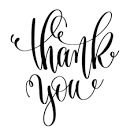